# Project - COVID-19 New Jersey Trends & Impact on RideSharing Platform

In [1]:
Mount your google drive where you've saved your assignment folder
from google.colab import drive
drive.mount('/content/gdrive')

In [2]:
cd '/content/gdrive/My Drive/CSE544_project_112669645/'

In [3]:
pip install dexplot

In [4]:
import pandas as pd
# import the seaborn module
import seaborn as sns
import matplotlib.pyplot as plt
import datetime  as dt
import numpy as np
from matplotlib.ticker import PercentFormatter
import os
import missingno as msno # visualize the distribution of NaN values
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly
from datetime import datetime
import dexplot as dxp
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import matplotlib.image as mpimg


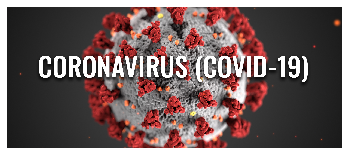

In [5]:
img=mpimg.imread('COVID19_Image.jpg')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

***COVID-19 Dataset --> We have taken New Jersey covid19 data***
source --> 
https://covidtracking.com/api/v1/states/daily.csv

***X Dataset --> We are trying to observe the impact of COVID-19 on the stock prices of major Ridesharing Players (Uber + Lyft)***

https://finance.yahoo.com/quote/UBER/history?p=UBER

https://finance.yahoo.com/quote/LYFT/history?p=LYFT

***Project Git Repository*** --> https://github.com/marif1901/COVID19_NJ_ImpactAnalysis

## Part 1: Data Pre Processing (10%)

In [6]:
cov_url= 'https://raw.githubusercontent.com/marif1901/COVID19_NJ_ImpactAnalysis/master/COVID19_NJ_Data.csv'
x_uber_url= "https://raw.githubusercontent.com/marif1901/COVID19_NJ_ImpactAnalysis/master/UBER_1Y.csv"
x_lyft_url= "https://raw.githubusercontent.com/marif1901/COVID19_NJ_ImpactAnalysis/master/LYFT_1Y.csv"




---



---


***Reading Datasets***

In [7]:
covid = pd.read_csv(cov_url,sep=',')# use sep="," for coma separation. 
xuber = pd.read_csv(x_uber_url,sep=',')
xlyft = pd.read_csv(x_lyft_url,sep=',')
print(covid.columns)
print(xuber.columns)
print(xlyft.columns)

Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'hash', 'dateChecked',
       'death', 'hospitalized', 'total', 'totalTestResults', 'posNeg', 'fips',
       'deathIncrease', 'hospitalizedIncrease', 'negativeIncrease',
       'positiveIncrease', 'totalTestResultsIncrease', 'dailypositvecases',
       'dailynegativecases', 'dailytestingdone', 'dailydeath'],
      dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')





---



---


***Preprocessing on COVID Data***

In [8]:
covid_cols= ['date','dailypositvecases','dailynegativecases','dailydeath','dailytestingdone',
             'positiveIncrease','negativeIncrease', 'deathIncrease','totalTestResultsIncrease',
            'positive', 'negative', 'death','totalTestResults']
covid_sel= covid[covid_cols].copy()

covid_cols= ['date','dailypositvecases','dailynegativecases','dailydeath','dailytestingdone',
             'positiveIncrease','negativeIncrease', 'deathIncrease','totalTestResultsIncrease',
            'cumpositive', 'cumnegative', 'cumdeath','cumtotalTestResults']

covid_sel.columns=  covid_cols

###### Dropping rows where data is NA

In [9]:
count_nulls= sum(pd.isna(covid_sel['date']))
print('\033[1m' + ' Total nulls found :' + str(count_nulls))
index = covid_sel[pd.isna(covid_sel['date'])].index
covid_sel.drop(index , inplace=True)

 Total nulls found :0


There are 0 rows in NJ COVID dataset, which have any missing values, therefore none of the rows have been dropped.

###### Converting date to proper %Y%m%d format

In [10]:
covid_sel['date']= covid_sel['date'].astype(str)
covid_sel['date'] = pd.to_datetime(covid_sel['date'], format='%Y%m%d').dt.strftime("%Y-%m-%d");


In [11]:
int_col= ['dailypositvecases','dailynegativecases','dailydeath','dailytestingdone',
             'positiveIncrease','negativeIncrease', 'deathIncrease','totalTestResultsIncrease',
            'cumpositive', 'cumnegative', 'cumdeath','cumtotalTestResults']
covid_sel[int_col] = covid_sel[int_col].astype(np.int32)
covid_sel.head(3)

date  dailypositvecases  dailynegativecases  dailydeath  \
0  2020-05-07              68760               90580        4341   
1  2020-05-06              64875               68443        4460   
2  2020-05-05              67015               88587        4089   

   dailytestingdone  positiveIncrease  negativeIncrease  deathIncrease  \
0            159340              1745              1993            252   
1            133318              1297                 0            305   
2            155602              2324              8079            334   

   totalTestResultsIncrease  cumpositive  cumnegative  cumdeath  \
0                      3738       133635       159023      8801   
1                      1297       131890       157030      8549   
2                     10403       130593       157030      8244   

   cumtotalTestResults  
0               292658  
1               288920  
2               287623

In [12]:
print('\033[1m' +'Min Date observed for COVID : ' + str(covid_sel['date'].min()))
print('\033[1m' + 'Max Date observed for COVID: ' + str(covid_sel['date'].max()))

Min Date observed for COVID : 2020-03-05
Max Date observed for COVID: 2020-05-07




---



---


***Preprocessing on X Data***

In [13]:
x_cols= ['Date','Close','Volume']

xuber_sel= xuber[x_cols].copy()
xlyft_sel= xlyft[x_cols].copy()

x_cols= ['date','UberClosingPrice','UberVolume']
xuber_sel.columns= x_cols

x_cols= ['date','LyftClosingPrice','LyftVolume']
xlyft_sel.columns=x_cols

In [14]:
xuber_sel.date= pd.to_datetime(xuber_sel['date']).dt.strftime('%Y-%m-%d')
xlyft_sel.date=pd.to_datetime(xlyft_sel['date']).dt.strftime('%Y-%m-%d')

In [15]:
x_sel= pd.merge(xuber_sel, xlyft_sel,on='date')
print('\033[1m' + 'Min Date observed for X : ' + str(x_sel['date'].min()))
print('\033[1m' + 'Max Date observed for X: ' + str(x_sel['date'].max()))

Min Date observed for X : 2019-05-10
Max Date observed for X: 2020-05-07


In [16]:
x_sel.head(3)

date  UberClosingPrice  UberVolume  LyftClosingPrice  LyftVolume
0  2019-05-10         41.570000   186322500         51.090000    23111200
1  2019-05-13         37.099998    79442400         48.150002    10007400
2  2019-05-14         39.959999    46661100         50.520000     7007400

###### Merging COVID data with X Data for Analysing impact in the same time frame

In [17]:
comb_df= covid_sel.merge(x_sel, how='inner', on='date')
comb_df=comb_df.drop_duplicates()
print('\033[1m' + 'Min Date observed for comb_df : ' + str(comb_df['date'].min()))
print('\033[1m' + 'Max Date observed for comb_df: ' + str(comb_df['date'].max()))

Min Date observed for comb_df : 2020-03-05
Max Date observed for comb_df: 2020-05-07


###### Filtering 8 weeks timeframe for Analysis, Starting Date from. Monday 9th March, End Date Sunday 3rd May

In [18]:
st_dt= pd.to_datetime('2020-03-09').strftime('%Y-%m-%d')
# print(st_dt)
end_dt= pd.to_datetime('2020-05-04').strftime('%Y-%m-%d')
# print(end_dt)

comb_df = comb_df[ (comb_df['date']>=st_dt) & (comb_df['date']<= end_dt)] 

print('\033[1m' + 'Min Date observed for comb_df : ' + str(comb_df['date'].min()))
print('\033[1m' + 'Max Date observed for comb_df: ' + str(comb_df['date'].max()))
print('\033[1m' + 'Total Rows * cols: ' + str(comb_df.shape))

comb_df.head(3)

Min Date observed for comb_df : 2020-03-09
Max Date observed for comb_df: 2020-05-04
Total Rows * cols: (40, 17)


date  dailypositvecases  dailynegativecases  dailydeath  \
3  2020-05-04              63578               68443        4155   
4  2020-05-01              61664               70781        3626   
5  2020-04-30              59526               64574        3912   

   dailytestingdone  positiveIncrease  negativeIncrease  deathIncrease  \
3            132021              1525               629             39   
4            132445              2538              6089            310   
5            124100              2388              4212            458   

   totalTestResultsIncrease  cumpositive  cumnegative  cumdeath  \
3                      2154       128269       148951      7910   
4                      8627       121190       135355      7538   
5                      6600       118652       129266      7228   

   cumtotalTestResults  UberClosingPrice  UberVolume  LyftClosingPrice  \
3               277220         27.420000    23428300         27.030001   
4               256545         28.389999    19290200         29.605000   
5               247918         30.270000    20095400         32.830002   

   LyftVolume  
3    13393000  
4     7339100  
5     4624500

###### Assigning Week Number

In [19]:
comb_df['WeekNum'] = ((pd.to_datetime(comb_df['date']) - pd.to_datetime(st_dt)).dt.days)//7 +1



---



---


***Checking Nullity and Data Completeness***

Text(0.5, 1.0, 'Data Completenss Check for Combined data')

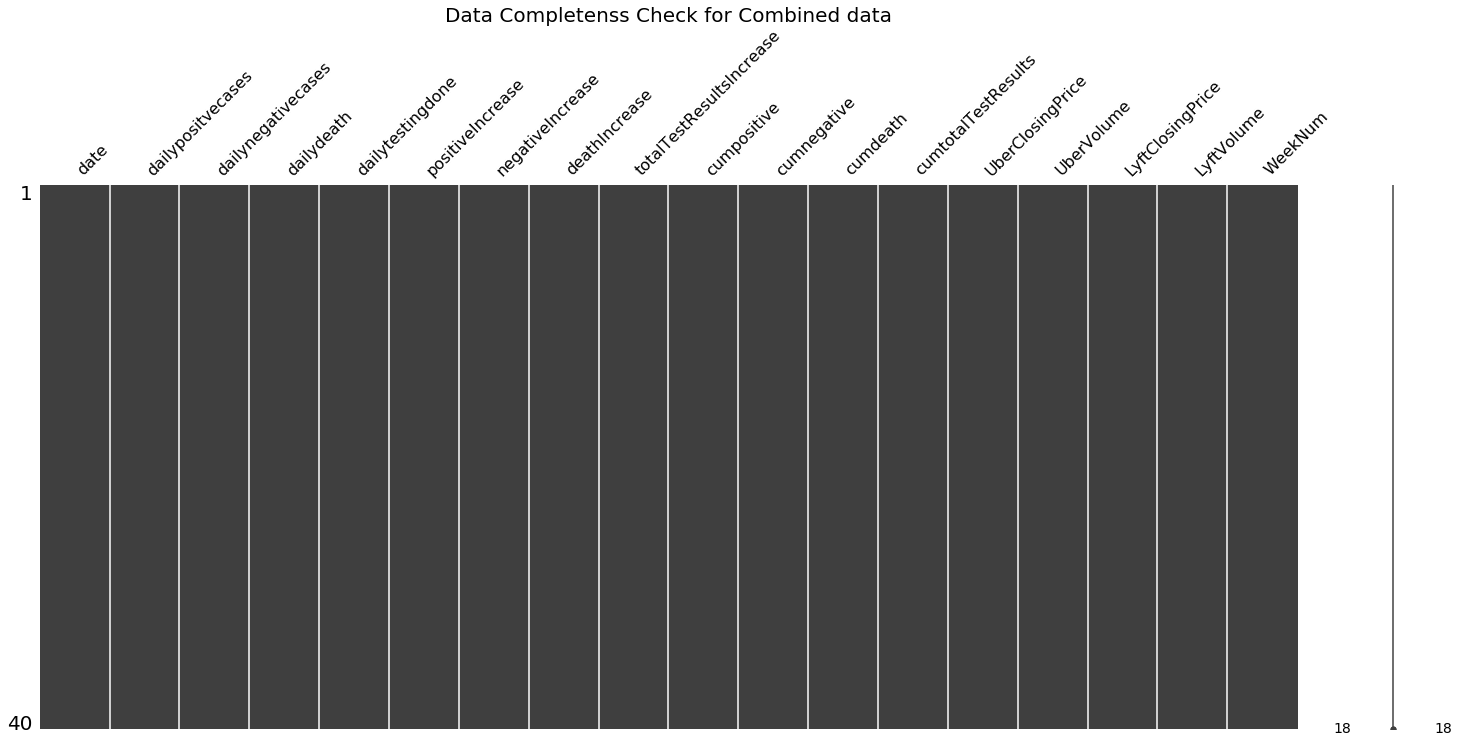

In [20]:
msno.matrix(comb_df)
plt.title('Data Completenss Check for Combined data', size = 20)

###### No Nullity found above
Even after merging X-dataset with NJ COVID dataset, there are 0 rows, which have any missing values, therefore no need to drop any rows.



---



---


**Let's Apply the Tukey's Rule to check if there are any data Outliers**



*   First, we have calculated First Quartile(Q1) and Second Quartile(Q3)

*   Then, we have calculated Inter-Quartile Range(IQR) - Q3-Q1


*   Now, as per Tukey’s Rule, all those values which are less than (Q1 - 1.5 times IQR) or greater than (Q3 + 1.5 times IQR) are outliers.

*   So, we are applying Tukey’s Rule on each column/feature and declaring a row as outlier which has at least one feature as outlier.





In [21]:
Q1 = comb_df.quantile(0.25)
Q3 = comb_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR.astype(np.int32))
print('\033[1m' + 'shape before Outlier Detection' + str(comb_df.shape))

dailypositvecases              44245
dailynegativecases             44204
dailydeath                      2337
dailytestingdone               88831
positiveIncrease                2746
negativeIncrease                3503
deathIncrease                    300
totalTestResultsIncrease        6036
cumpositive                    87345
cumnegative                    89712
cumdeath                        4448
cumtotalTestResults           177058
UberClosingPrice                   3
UberVolume                  17006075
LyftClosingPrice                   6
LyftVolume                   6008325
WeekNum                            4
dtype: int32
shape before Outlier Detection(40, 18)


In [22]:
comb_out = comb_df[~((comb_df < (Q1 - 1.5 * IQR)) |(comb_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print('\033[1m' + 'shape after Outlier Detection' + str(comb_out.shape))
# comb_df= comb_out.copy()

shape after Outlier Detection(36, 18)


**We can see that after Outlier detection we are left with 36 rows, 4 rows are deleted**



In [23]:
comb_df= comb_df.sort_values(by="date")

**Comments: Few outliers detected, indicating that the overall data is a good fit for inferences. We faced some issues to make all date format consistent but used pandas in-built functions to resolve them accordingly.**


## Part 2: General Trends in Covid + X Data (10%)



---



---


***Day on Day Trends | PDF  | CDF of COVID 19 Growth***

In [24]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=comb_df['date'], y=comb_df['dailypositvecases'], 
                         mode='lines+markers', name='Confirmed'))
fig.add_trace(go.Scatter(x=comb_df['date'], y=comb_df['dailydeath'], 
                         mode='lines+markers', name='Deaths'))
fig.add_trace(go.Scatter(x=comb_df['date'], y=comb_df['dailynegativecases'], 
                         mode='lines+markers', name='Negative'))

fig.update_layout(
        xaxis_title="",
        yaxis_title="",
        title = '[Daily Cases] - Confirmed, Deaths & Negative'
#         yaxis_type="log"
    )
fig.show()



---



---


**Let's check the distribution of data for Confirmed Cases, Negative Cases and Deaths**

Text(0.5, 0.98, 'Distribution of Day on Day in Confirmed Cases | Negative Cases & Deaths')

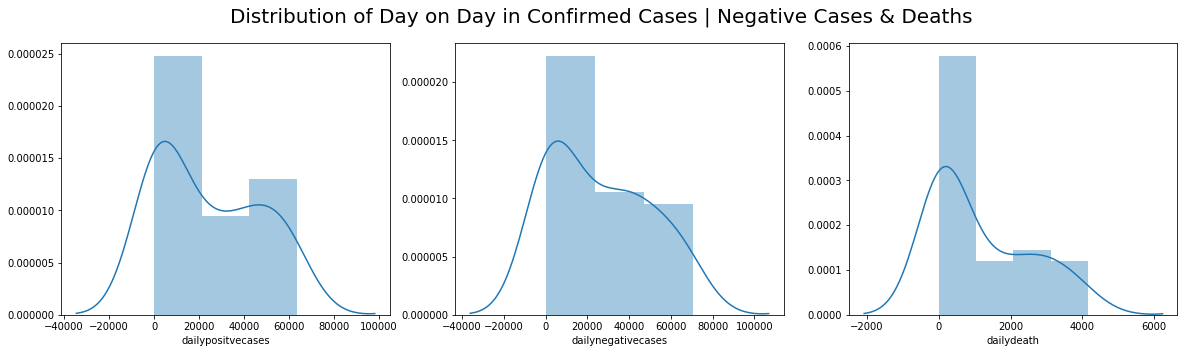

In [25]:
#histogram
fig = plt.figure(figsize= (20,5))
plt.subplot(1,3,1)
sns.distplot(comb_df['dailypositvecases'])

plt.subplot(1,3,2)
sns.distplot(comb_df['dailynegativecases'])

plt.subplot(1,3,3)
sns.distplot(comb_df['dailydeath'])

fig.suptitle("Distribution of Day on Day in Confirmed Cases | Negative Cases & Deaths", fontsize=20)


**Inference from above graph: we can clearly see that for confirmed and negative cases it follows a smooth curve with fluctuations while death is mostly uniform after certain number of days so its flat in nature**



---



---


**"CURVE IS FLATTENING" after 2 Months ??**

In [26]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=comb_df['date'], y=comb_df['cumpositive'], 
                         mode='lines+markers', name='Confirmed'))
fig.add_trace(go.Scatter(x=comb_df['date'], y=comb_df['cumdeath'], 
                         mode='lines+markers', name='Deaths'))
fig.add_trace(go.Scatter(x=comb_df['date'], y=comb_df['cumnegative'], 
                         mode='lines+markers', name='Negative'))

fig.update_layout(
        xaxis_title="Date",
        yaxis_title="Cumulative Cases [(X<=x)]",
#         title = 'Cumulative -> Confirmed, Deaths & Negative Results'
        title = 'Cumulative Cases [Log Scale]-> Confirmed, Deaths & Negative Cases',
        yaxis_type="log"
    )
fig.show()

**Inference from above graph: It can be observed there was a steep increase in the confirm cases from Mar9 to Apr6 since then the rate of increase seems to be decreasing and curve looks to be flattening after Apr20 while death is observed to be increasing at constant pace**



---



---



---





---



---


***What are the Percentage Mix of Postive | Negative | Death Cases ??***

In [27]:
df_t= comb_df.copy()
df_t['Positive Rate'] = df_t['cumpositive']*100/df_t['cumtotalTestResults']
df_t['Negative Rate'] = df_t['cumnegative']*100/df_t['cumtotalTestResults']
df_t['Death Rate'] = df_t['cumdeath']*100/df_t['cumpositive']
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_t['date'], y=df_t['Positive Rate'], mode='lines+markers', name='Percentage Positive Cases'))
fig.add_trace(go.Scatter(x=df_t['date'], y=df_t['Negative Rate'], mode='lines+markers', name='Percentage Negative Cases'))
fig.add_trace(go.Scatter(x=df_t['date'], y=df_t['Death Rate'], mode='lines+markers', name='Percentage Death Cases'))
fig.update_layout(xaxis_title="Date",yaxis_title="Percentage Cases",title = '%age Confirmed Cases, Negative Cases & Death Cases')
fig.show()

**Inference from above graph: This is interesting that in the intial few days of the outbreak there are mostly postive cases, this is due to testing being limited to high potential people while we can see that with time testing has picked up and negative and positive cases seems to be breaking even in the current scenario and negative cases are more after the complete lockdown, while death rate seems to be gently increasing**



---



---





---



---


***Let's Observe Pre v/s Post COVID Outbreak Traded Stocks for Uber/Lyft***


In [28]:
## Sketch Pre period also for this
lockdown_dt= pd.to_datetime('2020-03-18').strftime('%Y-%m-%d')
x_sel['Period']= np.where(x_sel['date'] >= lockdown_dt, 'PostLockdown', 'PreLockdown')
x_sel['UberTradedStocks']= x_sel['UberVolume']* x_sel['UberClosingPrice']
x_sel['LyftTradedStocks']= x_sel['LyftVolume'] * x_sel['LyftClosingPrice']


Text(0.5, 0.98, 'Day on Day #Traded Stockcs  of Uber | Lyft Pre v/s Post Lockdown Period')

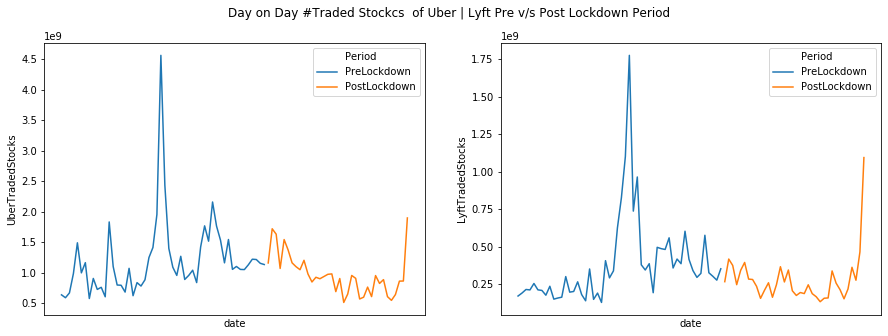

In [29]:
time_eda= pd.to_datetime('2020-01-01').strftime('%Y-%m-%d')
x_tmp= x_sel.copy()
x_tmp = x_tmp[x_tmp['date']>=time_eda] 
fig = plt.figure(figsize= (15,5))
plt.subplot(1,2,1)
g =sns.lineplot(x="date", y="UberTradedStocks",hue="Period",data=x_tmp)
g.set(xticks=[])
plt.subplot(1,2,2)
g =sns.lineplot(x="date", y="LyftTradedStocks",hue="Period",data=x_tmp)
g.set(xticks=[])
fig.suptitle("Day on Day #Traded Stockcs  of Uber | Lyft Pre v/s Post Lockdown Period", fontsize=12)

**Inference from above graph: We can clearly see that COVID19 outbreak has very badly hit ride sharing market, traded stocks have gone down by very high rate, can be seen from the pre v/s post lockdown period**



---



---





---



---


***Let's Plot Precentage Change Day on Day in StockPrices V/s Changes in #Cases***

In [30]:
df_temp= comb_df.copy()
df_temp['Uber_pctChange'] = df_temp['UberClosingPrice'].pct_change(periods=1)
df_temp['Lyft_pctChange'] = df_temp['LyftClosingPrice'].pct_change(periods=1)
df_temp['Confirmed_pctChange'] = df_temp['cumpositive'].pct_change(periods=1)
df_temp = df_temp.iloc[1:]
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_temp['date'], y=df_temp['Confirmed_pctChange'], mode='lines+markers', name='Confirmed_pctChange'))

fig.add_trace(go.Scatter(x=df_temp['date'], y=df_temp['Uber_pctChange'], mode='lines+markers', name='Uber_pctChange'))

fig.add_trace(go.Scatter(x=df_temp['date'], y=df_temp['Lyft_pctChange'], mode='lines+markers', name='Lyft_pctChange'))
fig.update_layout(xaxis_title="Date",yaxis_title="Rate of Change",
        title = 'Velocity of -> Confirmed Cases , LyftClosingPrice & UberClosingPrice')
fig.show()


***We can draw an inference from above plot is that rate of postive change in confirm case was very high in intital few weeks , later its has come to changes ~20% daily while Uber | Lyft are showing ripple around zero; meaning there are positve and negatve changes as the COVID rates are changing***



---



---





---



---


***Let's Plot the Histogram of Percentage Changes to see at what frequency we are observing postive and negative changes***

Text(0.5, 0.98, 'Histogram of Precentage Change Day on Day in Stock Prices of Uber | Lyft & Confirmed Cases')

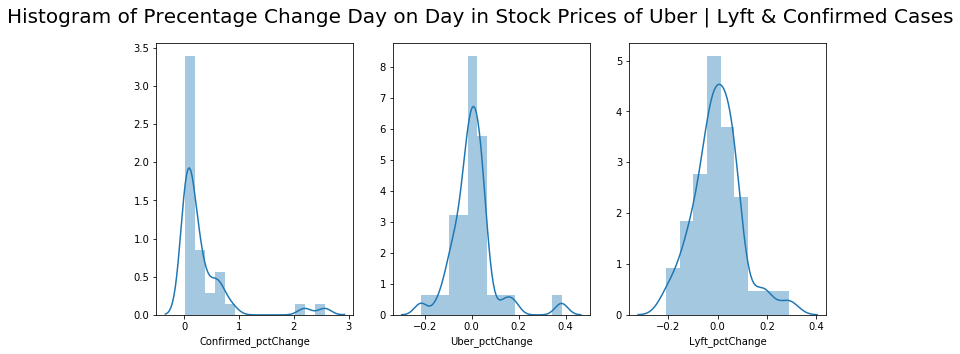

In [31]:
#histogram
fig = plt.figure(figsize= (12,5))
plt.subplot(1,3,1)
sns.distplot((df_temp['Confirmed_pctChange']))
plt.subplot(1,3,2)
sns.distplot(df_temp['Uber_pctChange'], label="Uber Changes")
plt.subplot(1,3,3)
sns.distplot((df_temp['Lyft_pctChange']))
fig.suptitle("Histogram of Precentage Change Day on Day in Stock Prices of Uber | Lyft & Confirmed Cases", fontsize=20)

*   ***Inference from above graph: As the velocity in the Positive Cases increases we see that velocity in the Uber & Lyft Price decreases and when the velocity of confirm cases decreases then velocity in the Stock Prices of Uber Lyft Increases***

*   ***Changes in the confirmed cases is right skewed which suggests increasing cases while for Uber & Lyft we see that its left skewed which shows a constant decline in this Stock Prices while Lyft has smooth fluctuation***



---



---





---



---


***Lets Provide GeoSpatial Mapping of New Jersey COVID Cases with Time***

In [32]:
df_temp=comb_df.copy()
df_temp['Country_Region']= 'NJ'
df_temp['Lat']= 39.833851
df_temp['Long']= -74.871826

df_temp = df_temp.groupby(['date', 'Country_Region','Lat','Long'])['cumpositive', 'cumdeath'].max().reset_index()
df_temp["date"] = pd.to_datetime(df_temp["date"]).dt.strftime('%m/%d/%Y')
df_temp.columns=['Last_Update','Country_Region','Lat','Long','Confirmed','Deaths']
df_temp['Confirmed'].fillna(0, inplace=True)
df_temp.sort_values('Confirmed', ascending=False).head(3)

Last_Update Country_Region        Lat       Long  Confirmed  Deaths
39  05/04/2020             NJ  39.833851 -74.871826     128269    7910
38  05/01/2020             NJ  39.833851 -74.871826     121190    7538
37  04/30/2020             NJ  39.833851 -74.871826     118652    7228

In [33]:
fig = px.scatter_geo(df_temp,
                     #locations="Country_Region",
                     locationmode='country names',
                     lat='Lat', lon='Long',
                     #hover_name="Country_Region",
                     hover_data=["Confirmed", "Deaths"], animation_frame="Last_Update",
                     color=np.log10(df_temp["Confirmed"]+1)-1, size=np.power(df_temp["Confirmed"]+1, 0.3)-1,
                     range_color= [0, max(np.log10(df_temp["Confirmed"]+1))],
                     title="COVID-19 Progression Animation Over Time",
                     color_continuous_scale=px.colors.sequential.Plasma,
                     projection="natural earth"
                    )
fig.update_coloraxes(colorscale="hot")
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [34]:
fig = px.choropleth(df_temp,
                    locations="Country_Region",
                    locationmode="USA-states",
                    hover_name="Country_Region",
                    hover_data=["Confirmed", "Deaths"], animation_frame="Last_Update",
                    color=np.log10(df_temp["Confirmed"]), 
                    title="COVID-19 Progression Animation in New Jersey Over Time",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    scope="usa",
                   )
fig.update(layout_coloraxis_showscale=False)
fig.show()


## Part 3: Required Inferences (50%)

### 3.1 Predicting the COVID19 fatality & #cases over next one week

Use your COVID19 dataset to predict the COVID19 fatality and #cases for the next one week. Use the following four prediction techniques: (i) AR(3), (ii) AR(5), (iii) EWMA with alpha = 0.5, and (iv) EWMA with alpha = 0.8. Make sure that your dataset allows you to verify the one week prediction. For example, use the first three weeks of data to predict the fourth week, and report the accuracy of your predictions using the actual fourth week data. Use metrics learned in class (MAPE as a % and MSE) to report accuracy numbers.



*   For prediction purpose we have taken last 4 week of COVID data.
*   Train Data - (Week 4 - Week 6) & Test Data -  Week 7



In [35]:
ts_data=covid_sel[['date','dailydeath']]
ts_data['WeekNum'] = ((pd.to_datetime(ts_data['date']) - pd.to_datetime(st_dt)).dt.days)//7 +1

posterior_data = ts_data[(ts_data['WeekNum']<=7) & (ts_data['WeekNum']>=4)]
posterior_data = posterior_data.sort_values(by="date").reset_index(drop=True)

weekly_data = ts_data[(ts_data['WeekNum']<=6) & (ts_data['WeekNum']>=4)]
weekly_data = weekly_data.sort_values(by="date").reset_index(drop=True)

test_data = ts_data[(ts_data['WeekNum']==7)]
test_data = test_data.sort_values(by="date").reset_index(drop=True)

print('\033[1m' +'Min Date observed for COVID : ' + str(weekly_data['date'].min()))
print('\033[1m' + 'Max Date observed for COVID: ' + str(weekly_data['date'].max()))

weekly_data['date']=pd.to_datetime(weekly_data['date'])
test_data['date']=pd.to_datetime(test_data['date'])

Min Date observed for COVID : 2020-03-30
Max Date observed for COVID: 2020-04-19


In [36]:
ts_data_cnf=covid_sel[['date','dailypositvecases']]
ts_data_cnf['WeekNum'] = ((pd.to_datetime(ts_data_cnf['date']) - pd.to_datetime(st_dt)).dt.days)//7 +1

weekly_data_cnf = ts_data_cnf[(ts_data_cnf['WeekNum']<=6) & (ts_data_cnf['WeekNum']>=4)]
weekly_data_cnf = weekly_data_cnf.sort_values(by="date").reset_index(drop=True)

test_data_cnf = ts_data_cnf[(ts_data_cnf['WeekNum']==7)]
test_data_cnf = test_data_cnf.sort_values(by="date").reset_index(drop=True)

print('\033[1m' +'Min Date observed for COVID : ' + str(weekly_data_cnf['date'].min()))
print('\033[1m' + 'Max Date observed for COVID: ' + str(weekly_data_cnf['date'].max()))

weekly_data_cnf['date']=pd.to_datetime(weekly_data_cnf['date'])
test_data_cnf['date']=pd.to_datetime(test_data_cnf['date'])

Min Date observed for COVID : 2020-03-30
Max Date observed for COVID: 2020-04-19


#### 3.1.1 AR(3)

**Performing Auto Regression Using OLS Method:**


*   For window size "p", we will have "p+1" coffecient, where first feature will be always 1 and subsequent p feature will be last "p" values.

*   Let's say p = 3. In our case, for train data has 21 days of data, so shape of X matrix -> (18x4) and Y martix -> (18x1)
*   Y -> always last 21 days values, p -> window size

>AR(p)   
>*    initial_coffe = get_beta_coeff(Y, p)    
>*    predict(Y, p, initail_coffe) 

>predict(Y, p, coffe)
>*    For 7 days    
>*    get prediction for ith day    
>*    Update Y by remove 1st value and appending latest value    
>*    coffe = get_beta_coeff(Y, p)  # re-train to udpate coffe











In [37]:
# Y_hat= B0 + B1(Y_t-1) + B2(Y_t-2) + B3(Y_t-3)
# Predicting #fatalities using AR(3)
# Auto Regression using 3 weeks data to predict 4th weeks' fatalities. Here , n=21 (7 for test data),p=2
def load_data(y_data):
    Y = y_data.to_numpy()   #(21,)
    Y=Y.reshape(-1,1)     #(21,1)
    return Y
    
# Y -> last 21 days data, p -> window size
def get_beta_coeff(Y,p):
    low=0
    high=p
    Y_row=Y.T
    Y_row.tolist()
    Y_row = Y_row[0]
    ones=[1]
    d = []
    while high < len(Y_row):
        temp=[*ones,*Y_row[low: high]]
        d.append(temp)
        low += 1
        high += 1
    
    X=np.asarray(d)    #(18,4)
    X_Transpose=X.T               #(4,18)
    XT_X=np.dot(X_Transpose,X)    #(4,4)
    inv= np.linalg.inv(XT_X)  #(4,4)
    
    beta_OLS = np.dot(np.dot(inv,X_Transpose), Y[p:len(Y)])   #(18,1)
    return beta_OLS,Y


In [38]:
# Y -> last 21 days, p -> window size
def predict(beta_coeff, Y, p, test_data, col_name):
    y_pred = []
    for i in range(7):
        f = Y[len(Y)-p:]
        f = f.T
        f = f[0].tolist()
        f.insert(0, 1)
        f=np.asarray(f)
        f=f.reshape(-1,p+1)
        
        # append predicted
        y_pred.append(np.dot(f,beta_coeff))
        
        # add next true Y
        Y=np.concatenate((Y, ((test_data[col_name][i:i+1]).to_numpy()).reshape(-1,1)))
        beta_coeff,Y=get_beta_coeff(Y,p)
    
    return np.array(y_pred).reshape(-1,1)

def compare_y(true_data,pred_data,col_name):
    true_y=true_data[col_name][-7:]
    predicted_y=pred_data[-7:]
    pred_y=[j for sub in predicted_y for j in sub] 

    #Comparison b/w True and Predicted values
    table = pd.DataFrame(columns=['True Value','Predicted Value'])
    table['True Value']=true_y
    table['Predicted Value']=pred_y
    print(table)
    return true_y,pred_y

In [39]:
def get_accuracy(true_y,pred_y):
    # MSE = (Y[-7:]-test_data['dailydeath'])/100
        mse=np.mean((true_y-pred_y)**2)
        print('\033[1m' + "Mean Squared Error is :",mse)
        
    #MAPE calculation as a % | Formula: 1/n Summation(|(true-predicted)/true|*100)
        pred_y = np.round(pred_y)
        mape=np.sum(np.abs((true_y-pred_y)/true_y))/7
        print('\033[1m' + "MAPE as a %:",mape*100)

In [40]:
def AR(p, test_data, col_name, weekly_data):
    y_data = load_data(weekly_data[col_name]) 
    beta_OLS,Y = get_beta_coeff(y_data,p)
    pred_data = predict(beta_OLS,Y,p, test_data, col_name)
    true_y,pred_y = compare_y(test_data,pred_data,col_name) #changes
    get_accuracy(true_y,pred_y)
    return true_y,pred_y

In [41]:
def plot_bar_actual_pred(test_data,predicted_data, title):
  var= title
  plt.plot(test_data, predicted_data)
  plt.title(var, size=15)
  plt.xlabel('Actual', size= 15)
  plt.ylabel('Predicted', size=15)
  plt.show()
  print() 

In [42]:
def plot_actual_predicted(test_data, predicted_data):
  y_test_flat= test_data
  y_pred_flat=predicted_data
  
  df = pd.DataFrame({'Actual': y_test_flat, 'Predicted': y_pred_flat})
  df1 = df.head(25)
  df1.plot(kind='line',figsize=(16,5))
  plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
  plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
  plt.title('Actual V/s  Predicted  Values',size=15)
  plt.show()



---



---


***Output for AR(p=3)***

**For Daily Death**

   True Value  Predicted Value
0        2422      2496.838311
1        2331      2150.550394
2        2732      2742.020696
3        2636      2646.843137
4        2981      3045.116901
5        2882      2936.285192
6        3056      3264.961762
Mean Squared Error is : 12729.099683320577
MAPE as a %: 3.2087982649997087




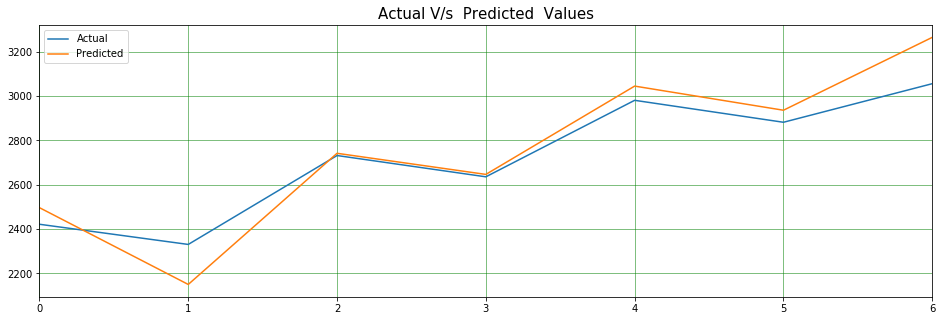

In [43]:
true_y,pred_y= AR(3, test_data, 'dailydeath',weekly_data)
print('\n')
# plot_bar_actual_pred(true_y,pred_y,'Actual v/s Predicted for AR(p=3)')
plot_actual_predicted(true_y, pred_y)



*   **Inference -> Model AR(3) performed pretty good. It actually following the same trend as the actual values i.e. prediction is increasing as actual values are increaing or vice-versa. For 3rd and 4th day predicted values and actual values are nearly same.**



***For Daily Confirm Cases***

   True Value  Predicted Value
0       45270     44655.980909
1       47117     46743.381595
2       48748     48490.190305
3       51241     50405.602662
4       50955     51897.747440
5       54568     55154.678697
6       54470     54279.835028
Mean Squared Error is : 364298.8646285901
MAPE as a %: 1.0834389545913425




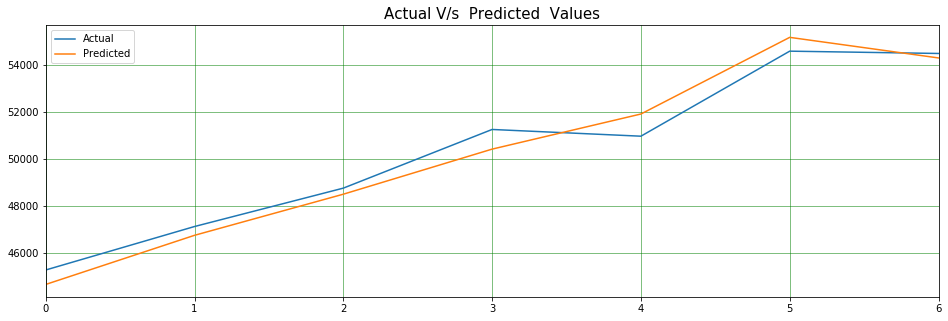

In [44]:
true_y,pred_y= AR(3, test_data_cnf, 'dailypositvecases',weekly_data_cnf)
print('\n')
# plot_bar_actual_pred(true_y,pred_y,'Actual v/s Predicted for AR(p=3)')
plot_actual_predicted(true_y, pred_y)

#### 3.1.2 AR(5)



---


***Output for AR(p=5)***

***For daily Death Cases***

   True Value  Predicted Value
0        2422      2578.721039
1        2331      2217.648258
2        2732      2878.562863
3        2636      2641.182276
4        2981      3028.582715
5        2882      2934.520929
6        3056      3286.290416
Mean Squared Error is : 16710.5526933716
MAPE as a %: 3.9822403406494185




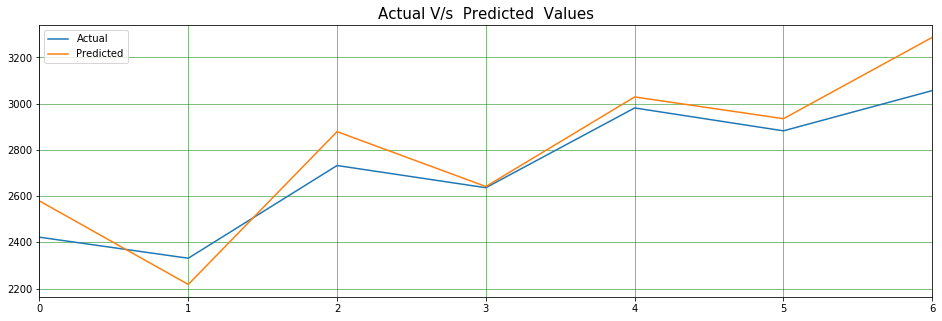

In [45]:
true_y,pred_y= AR(5, test_data, 'dailydeath',weekly_data)
print('\n')
# plot_bar_actual_pred(true_y,pred_y,'Actual v/s Predicted for AR(p=5)')
plot_actual_predicted(true_y, pred_y)



*   **Inference -> AR(5) performed relatively poor than AR(3) as MAPE and MSE both are higher than AR(3). Predicted value is almost always higher than actual. This might be because # deaths changes rapily. It does not depend on more than last 3 days. Reason for this might be lockdown or people precaution's activity changes day by day.**



***For daily Confirm Cases***

   True Value  Predicted Value
0       45270     44639.353514
1       47117     46720.533875
2       48748     48557.062880
3       51241     50471.250274
4       50955     52111.377949
5       54568     55086.067563
6       54470     54386.394049
Mean Squared Error is : 399495.13163489
MAPE as a %: 1.0715699955751246




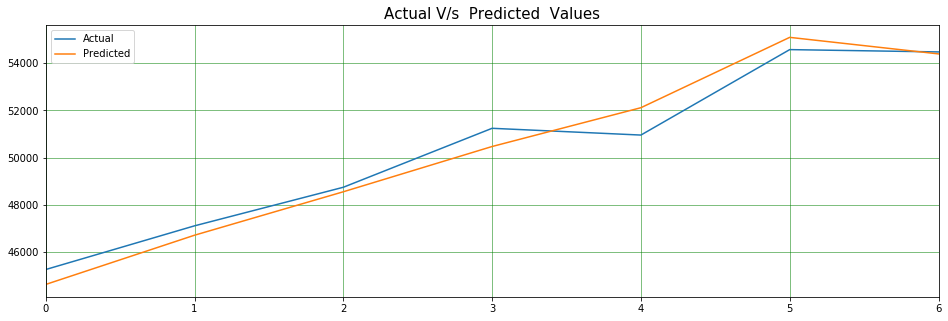

In [46]:
true_y,pred_y= AR(5, test_data_cnf, 'dailypositvecases',weekly_data_cnf)
print('\n')
plot_actual_predicted(true_y, pred_y)

#### 3.1.3 EWMA with alpha = 0.5


> exponential_smoothing(train, alpha, test)    
>*   Iterate through train to find predicted value for 21st day, which will be used in prediction of 22nd day
>*   Now, iterate through test data to find predicted value.





In [47]:
# train -> last 21 days data, test -> actual values for next 7 days
def exponential_smoothing(train, alpha, test):
    """given a series and alpha, return series of expoentially smoothed points"""
    results = np.zeros_like(train)
    
    # first value remains the same as series,
    # as there is no history to learn from
    results[0] = train[0] 
    for t in range(1, train.shape[0]):
       # T'th prediction = alpha * (T-1)th actual + (1 - alpha) * (T-1)th predicted
        results[t] = alpha * train[t-1] + (1 - alpha) * results[t - 1]
    
    ans = np.zeros_like(test)
    ans[0]= results[20] * (1 - alpha) + alpha * train[20] 
    for t in range(1, test.shape[0]):
      # T'th prediction = alpha * (T-1)th actual + (1 - alpha) * (T-1)th predicted
        ans[t] = alpha * test[t-1] + (1 - alpha) * ans[t - 1]
    
    return ans

In [48]:
def compare(EMA_predicted,test_data,colname):
    table=pd.DataFrame(columns=['true_values','prediction'])
    # print("table",table)
    table['prediction'] = EMA_predicted
    table['true_values'] = test_data[colname]
    print(table)
    true_y = test_data[colname]
    pred_y = EMA_predicted
    mse=np.mean((true_y-pred_y)**2)
    print('\033[1m' + "Mean Squared Error is :",mse)
        
    #MAPE calculation as a % | Formula: 1/n Summation(|(true-predicted)/true|*100)
    pred_y = np.round(pred_y)
    mape=np.sum(np.abs((true_y-pred_y)/true_y))/7
    print('\033[1m' + "MAPE as a %:",mape*100)

***For daily Death Cases***

   true_values  prediction
0         2422        1983
1         2331        2202
2         2732        2266
3         2636        2499
4         2981        2567
5         2882        2774
6         3056        2828
Mean Squared Error is : 97190.14285714286
MAPE as a %: 10.1442969909101


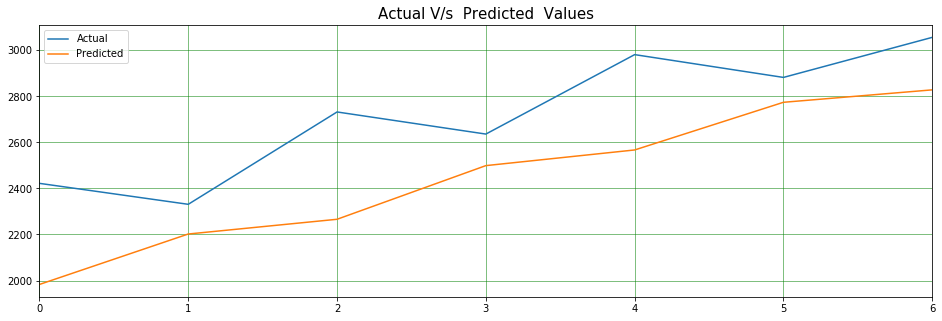

In [49]:
EMA_predicted= exponential_smoothing(weekly_data['dailydeath'], 0.5, test_data['dailydeath'])
estimated_values=test_data['dailydeath'].copy() # replace testdata with your test dataset
estimated_values['predict'] = EMA_predicted[1:]
compare(EMA_predicted,test_data,'dailydeath')
plot_actual_predicted(list(test_data['dailydeath']),list(EMA_predicted))



*   **Inference -> EWMA(0.5) does not perform that great. The reason for this is it gives equal weight i.e. 0.5 to all data observed so far, which is not the case in real life. As # deaths does not depend equally on all last days. It depends relatively more on last 3-4 days compare to last 21 days**



***For daily Confirm Cases***

   true_values  prediction
0        45270       41770
1        47117       43520
2        48748       45318
3        51241       47033
4        50955       49137
5        54568       50046
6        54470       52307
Mean Squared Error is : 11870392.857142856
MAPE as a %: 6.634241699477745


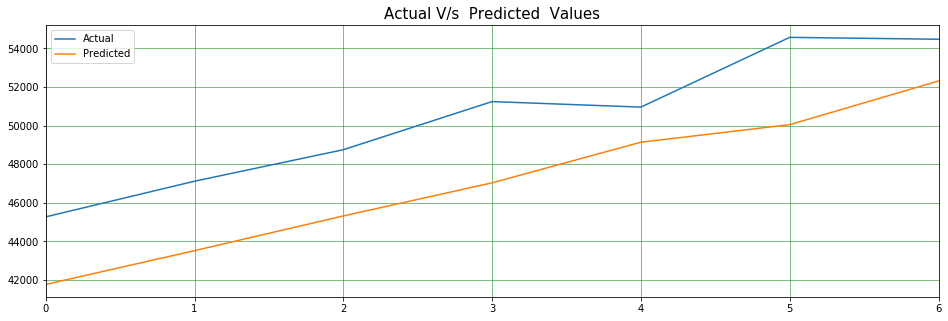

In [50]:
EMA_predicted= exponential_smoothing(weekly_data_cnf['dailypositvecases'], 0.5, test_data_cnf['dailypositvecases'])
estimated_values=test_data_cnf['dailypositvecases'].copy() # replace testdata with your test dataset
estimated_values['predict'] = EMA_predicted[1:]
compare(EMA_predicted,test_data_cnf,'dailypositvecases')
plot_actual_predicted(list(test_data_cnf['dailypositvecases']),list(EMA_predicted))

#### 3.1.4 EWMA with alpha = 0.8

***For daily Death Cases***

   true_values  prediction
0         2422        1997
1         2331        2337
2         2732        2332
3         2636        2652
4         2981        2639
5         2882        2912
6         3056        2888
Mean Squared Error is : 69572.14285714286
MAPE as a %: 7.294876650481834




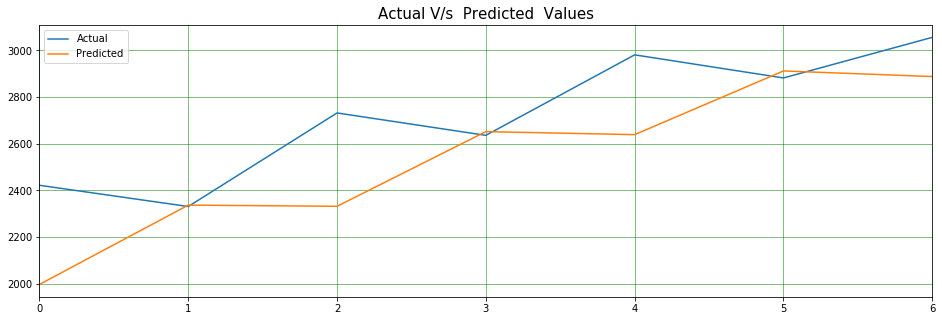

In [51]:
EMA_predicted= exponential_smoothing(weekly_data['dailydeath'], 0.8, test_data['dailydeath'])
estimated_values=test_data['dailydeath'].copy() # replace testdata with your test dataset
estimated_values['predict'] = EMA_predicted[1:]
compare(EMA_predicted,test_data,'dailydeath')
print('\n')
plot_actual_predicted(list(test_data['dailydeath']),list(EMA_predicted))

***For daily Confirm Cases***

   true_values  prediction
0        45270       43086
1        47117       44833
2        48748       46660
3        51241       48330
4        50955       50658
5        54568       50895
6        54470       53833
Mean Squared Error is : 5257869.142857143
MAPE as a %: 4.017073434368087


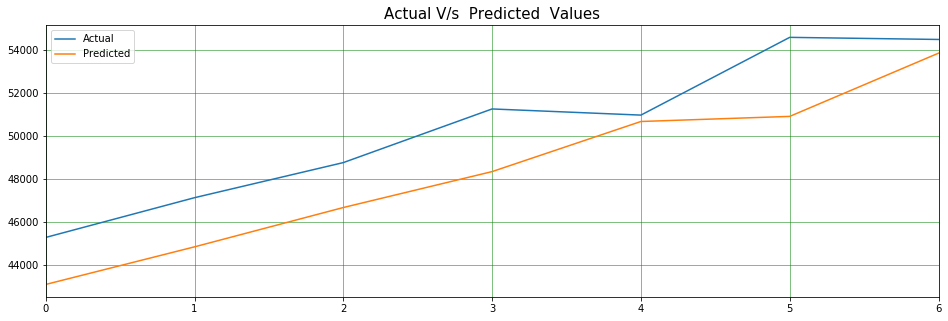

In [52]:
EMA_predicted= exponential_smoothing(weekly_data_cnf['dailypositvecases'], 0.8, test_data_cnf['dailypositvecases'])
estimated_values=test_data_cnf['dailypositvecases'].copy() # replace testdata with your test dataset
estimated_values['predict'] = EMA_predicted[1:]
compare(EMA_predicted,test_data_cnf,'dailypositvecases')
plot_actual_predicted(list(test_data_cnf['dailypositvecases']),list(EMA_predicted))



---



---



---





---


*    **Inference -> EWMA(0.8) performed relatively better than EWMA(0.5) for both Confirmed and Death Cases. The reason behind this is EWMA(0.8) gives more weight to last 2-3 days data than EWMA(0.5), which reflects real life scenario as mentioned above.**



---



---

Verdict: **AR(3) > AR(5) >> EWMA(0.8) > EWMA(0.5)** 






---



---



---



### 3.2 Apply the Wald’s test, Z-test, and t-test to check whether the mean of COVID19 deaths and #cases are different from the second-last week to the last week

Apply the Wald’s test, Z-test, and t-test (assume all are applicable) to check whether the mean of COVID19 deaths and #cases are different from the **second-last week to the last week** in your dataset. Use MLE for Wald’s test as the estimator; assume for Wald’s estimator purposes that daily data is Poisson distributed. Note, you have to report results for deaths and #cases separately, so think of this as two inferences. After running the test and reporting the numbers, check and comment on whether the tests are applicable or not. First use one-sample tests by computing the mean of the second-last week data and using that as guess for last week data. Then, repeat with a **two-sample version of Wald and t-tests**. For t-test, use both paired and unpaired tests. Use alpha value of 0.05 for all. For t-test, the threshold to check against is tn-1, alpha/2 for two-tailed, where n is the number of data points. You can find these values in online t tables, similar to z tables. For Z-test, use the sample standard deviation of the entire covid19 dataset you have and use that as the true sigma value

In [53]:
st_dt = pd.to_datetime('2020-03-09').strftime('%Y-%m-%d')
end_dt= pd.to_datetime('2020-05-04').strftime('%Y-%m-%d')
covid_sel_2 = covid_sel[ (covid_sel['date']>=st_dt) & (covid_sel['date']<= end_dt)] 
covid_sel_2 = covid_sel_2.sort_values('date')

In [54]:
covid_sel_2 = covid_sel_2.tail(14)

test_df = covid_sel_2[['dailypositvecases', 'dailydeath' ,'date']] 
week_1 = test_df.head(7)
week_1_cases = week_1['dailypositvecases'].tolist()
w1_deaths = week_1['dailydeath'].tolist()

last_week_df = test_df.tail(7)
week_last_cases = last_week_df['dailypositvecases'].tolist()
w_last_deaths =  last_week_df['dailydeath'].tolist()



---



---

## 3.2.1 One Sample tests 

### First Hypothesis

*   H0 : Mean of last week's COVID19 DAILY POSITIVE CASES equal to guess value [sample mean of second-last week]
*   HA : Mean of last week's COVID19 DAILY POSITIVE CASES NOT equal to guess value [sample mean of second-last week]

---

### Second Hypothesis


*   H0: Mean of last week's COVID19 deaths equal to guess value [sample mean of second-last week]
*   HA : Mean of last week's COVID19 deaths NOT equal to guess value [sample mean of second-last week]


**Check if Sample is Normally Distributed**

Text(0.5, 1.0, 'Probplot for Daily positive cases for last week sample against Normal dist')

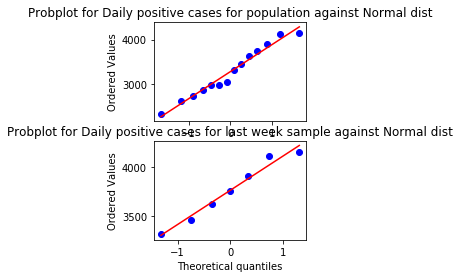

In [55]:
# Create prob plot to compare against normal distribution 
# Checking for all daily positive cases 
from scipy import stats

ax1 = plt.subplot(221)
res = stats.probplot(test_df['dailydeath'], plot=plt)
ax11 = plt.subplot(223)
res2 = stats.probplot(w_last_deaths, plot=plt)
ax1.set_title("Probplot for Daily positive cases for population against Normal dist")
ax11.set_title("Probplot for Daily positive cases for last week sample against Normal dist")

Text(0.5, 1.0, 'Probplot for Daily Deaths for last week sample against Normal dist')

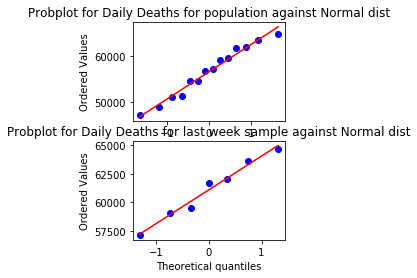

In [56]:
ax1 = plt.subplot(221)
res = stats.probplot(test_df['dailypositvecases'], plot=plt)
ax11 = plt.subplot(223)
res2 = stats.probplot(week_last_cases, plot=plt)
ax1.set_title("Probplot for Daily Deaths for population against Normal dist")
ax11.set_title("Probplot for Daily Deaths for last week sample against Normal dist")

**Note: To validate if our sample and population for number of daily positive cases and daily deaths follow a normal distribution. We have made use of the Scipy libaray function probplot to test the distrinutions against a standard normal. The red line Thus we can estimate that our distribution is normal**

Generates a probability plot of sample data against the quantiles of a specified theoretical distribution (the normal distribution by default).
More the number of points lying on the red line are indicator of the data being normally distributed.

**One sample Wald's Test**

In [57]:
import math
def get_parameters_mle(X):
    # assuming Poisson Distribution
    lambda_hat = np.mean(X)
    se_hat = math.sqrt(lambda_hat/len(X))
    return lambda_hat, se_hat

def get_walds_statistic(theta_0,data):
    theta_hat, se_hat = get_parameters_mle(data)
    w_stat = (theta_hat - theta_0) / se_hat
    return w_stat

In [58]:
def print_H_stat(est_hat, est_0,type):
  if type=='confirm':
    if abs(est_hat) <= est_0:
      print('\033[1m' + "Accept H0: Mean of COVID19 DAILY POSITIVE CASES are same for the second last week and last week")
    else:
      print('\033[1m' + "Reject H0 i.e Mean of COVID19 DAILY POSITIVE CASES are NOT same for the second last week and last week")
  elif type=='death':
    if abs(est_hat) <= est_0:
      print('\033[1m' + "Accept H0: Mean of number of COVID19 deaths are same for the second last and last week")
    else:
      print('\033[1m' + "Reject H0 i.e Mean of COVID19 deaths are NOT same for the second last week and last week")

**For daily positive cases--**

In [59]:
# For daily positive cases - 
theta_0_cases = np.mean(week_1_cases)
w_stat = get_walds_statistic(theta_0_cases, week_last_cases)
print('\033[1m' + "The Wald's Statistic for the first hypothesis is ", str(w_stat ))
z_a2 = 1.96
print_H_stat(w_stat,z_a2,'confirm')

The Wald's Statistic for the first hypothesis is  97.78977735122575
Reject H0 i.e Mean of COVID19 DAILY POSITIVE CASES are NOT same for the second last week and last week


**For daily Death cases--**

In [60]:
# For daily deaths - 

theta_0_deaths = np.mean(w1_deaths)
w_stat_2 =get_walds_statistic(theta_0_deaths, w_last_deaths)
print('\033[1m' + "The Wald's Statistic for the Second hypothesis is ", str(w_stat_2))
print_H_stat(w_stat,z_a2,'death')

The Wald's Statistic for the Second hypothesis is  41.45983478998244
Reject H0 i.e Mean of COVID19 deaths are NOT same for the second last week and last week




---


**Assumptions for one sample Wald's Test**


*   Estimate theta_hat should be asymptotically normal


---


**Does the test apply?**


*   Yes, because we are using MLE estimate for poisson. As per property of MLE, any MLE estimate is Asymptotically Normal






---



---



---


***One sample Z test***

In [61]:
def get_z_statistic(mu_0, data, sigma_pop):
    sample_mean = np.mean(data)
    n = len(data)
    z_stat = (sample_mean - mu_0) / (sigma_pop /math.sqrt(n))
    return z_stat

In [62]:
mu_0_cases = np.mean(week_1_cases)
mu_0_deaths = np.mean(w1_deaths)
population_cases_sigma = covid_sel['dailypositvecases'].std()
population_deaths_sigma = covid_sel['dailydeath'].std()

**For daily positive cases--**

In [63]:
# For daily positive cases - 
z_stat = get_z_statistic(mu_0_cases, week_last_cases, population_cases_sigma)
print('\033[1m' + "The Z Statistic for the first hypothesis is ",z_stat )
z_a2 = 1.96 
print_H_stat(z_stat,z_a2,'confirm')

The Z Statistic for the first hypothesis is  1.0034904939513414
Accept H0: Mean of COVID19 DAILY POSITIVE CASES are same for the second last week and last week


**For daily Death cases--**

In [64]:
# For daily deaths - 
z_stat_2 =get_z_statistic(mu_0_deaths, w_last_deaths, population_deaths_sigma)
print('\033[1m' + "The Z Statistic for the Second hypothesis is ",z_stat_2 )
print_H_stat(z_stat_2,z_a2,'death')

The Z Statistic for the Second hypothesis is  1.707520299137009
Accept H0: Mean of number of COVID19 deaths are same for the second last and last week


***Assumptions for one sample Z Test***
*   Since n is small in our case (CLT won't apply) , We can only use Z test if {X1, X2 .. Xn} are iid Nor(u, sigma square)
*   True standard deviation of the entire data is known

***Does the test apply?***
*   Z test wont work if n is small and sample is not normally distributed.
*   ***From our tests as shown in 3.2.0 where we check if our data is normally distributed. We see that our sample is infact normally distributed. Hence Z test will apply.***







---



---



---



**One sample T test**

*    "n" should be 6, because sample size is 7
*    For n = 6, alpha = 0.05, T_val = 2.4469

In [65]:
dof = len(week_last_cases) - 1
print('n for One sample T test' , dof)
alpha = 0.05
t_val = 2.4469

n for One sample T test 6


In [66]:
def get_sample_sd(D):
	mean = np.mean(D)
	sq_sum = sum([(i - mean) * (i-mean) for i in D])
	return math.sqrt(sq_sum / len(D))
 
def get_t_statistic(mu_0, data):
    sample_std = get_sample_sd(data)
    sample_mean = np.mean(data)
    n = len(data)
    w_stat = (sample_mean - mu_0) / (sample_std /math.sqrt(n))
    return w_stat

**For daily positive cases--**

In [67]:
mu_0_cases = np.mean(week_1_cases)
mu_0_deaths = np.mean(w1_deaths)

# For daily positive cases - 
t_stat = get_t_statistic(mu_0_cases, week_last_cases)
print('\033[1m' +  "The T test Statistic for the first hypothesis is ",t_stat )
print_H_stat(t_stat,t_val,'confirm')

The T test Statistic for the first hypothesis is  9.830213674075742
Reject H0 i.e Mean of COVID19 DAILY POSITIVE CASES are NOT same for the second last week and last week


**For daily positive cases--**

In [68]:
# For daily deaths - 
t_stat_2 = get_t_statistic(mu_0_deaths, w_last_deaths)
print('\033[1m' + "The T test Statistic for the Second hypothesis is ",t_stat_2 )
print_H_stat(t_stat_2,t_val,'death')

The T test Statistic for the Second hypothesis is  8.58209342573082
Reject H0 i.e Mean of COVID19 deaths are NOT same for the second last week and last week




---


**Assumptions for one sample T's Test**


*   Data Sample needs to be Normally distributed
*   useful when n < 30, smaller samples

---


**Does the test apply?**
*   Same as Z-test, need to check whether data is Normally Distributed or not. From our findings in section 3.2.0 we see that the data of the daily cases and deaths is infact normally distributed. 




## 3.2.2 Two Sample Test

### First Hypothesis

*   H0 : Mean of COVID19 DAILY POSITIVE CASES are same for the second-last week and last week
*   HA : Mean of COVID19 DAILY POSITIVE CASES are NOT same for the second-last week and last week

---

### Second Hypothesis


*   H0: Mean of number of COVID19 deaths are same for the second-last week and last week
*   HA : Mean of COVID19 deaths are NOT same for the second-last week and last week


In [69]:
def print_2sample_H_stat(est_hat, est_0,type):
  if type=='confirm':
    if abs(est_hat) <= est_0:
      print('\033[1m' + "Accept H0: Mean of COVID19 DAILY POSITIVE CASES are same for the first week and last week")
    else:
      print('\033[1m' + "Reject H0 i.e Mean of COVID19 DAILY POSITIVE CASES are NOT same for the first week and last week")
  elif type=='death':
    if abs(est_hat) <= est_0:
      print('\033[1m' + "Accept H0: Mean of number of COVID19 deaths are same for the first week and last week")
    else:
      print('\033[1m' + "Reject H0 i.e Mean of COVID19 deaths are NOT same for the first week and last week")



---



---


***Two Sample Wald's Test***

In [70]:
# Create delta 
delta_cases = [i-j for i,j in zip(week_1_cases, week_last_cases)]
delta_deaths = [i-j for i,j in zip(w1_deaths, w_last_deaths)]

delta_hat_cases = np.mean(week_1_cases) - np.mean(week_last_cases)
se_hat_cases = math.sqrt(np.var(delta_cases))
se_hat_deaths = math.sqrt(np.var(delta_deaths))
delta_hat_deaths = np.mean(w1_deaths) - np.mean(w_last_deaths)

**Delta in positive cases--**

In [71]:
w_stat_1 = delta_hat_cases / se_hat_cases
w_stat_2 = delta_hat_deaths / se_hat_deaths

print('\033[1m' +  "The Wald's Statistic for the first hypothesis is ",w_stat_1 )
z_a2 = 1.96 
print_2sample_H_stat(w_stat_1, z_a2,'confirm')

The Wald's Statistic for the first hypothesis is  -6.325057665298436
Reject H0 i.e Mean of COVID19 DAILY POSITIVE CASES are NOT same for the first week and last week


**Delta in Death cases--**

In [72]:
print('\033[1m' +  "The Wald's Statistic for the first hypothesis is ",w_stat_2 )
z_a2 = 1.96 
print_2sample_H_stat(w_stat_2, z_a2,'death')

The Wald's Statistic for the first hypothesis is  -3.4193984959978354
Reject H0 i.e Mean of COVID19 deaths are NOT same for the first week and last week


**Inference**


*   Delta in +ve cases: One Interesting insight is Wald's Statistics value is -ve, meaning last week's average # of +ve cases higher than 2nd last week.
*   Delta in deaths: Same as above, last week's average # of deaths higher than 2nd last week 



**Assumptions for two sample Wald's Test**


*   Estimate theta_hat for both samples data should be asymptotically normal


---


**Does the test apply?**


*   Yes, because we are using MLE estimate for both samples. As per property of MLE, any MLE estimate is Asymptotically Normal



---



---


***Two sample Paired T test***



*   "n" should be 6, because it is paired T test
*   For n = 6, alpha = 0.05, T_val = 2.4469



In [73]:
# Create delta 
delta_cases = [i-j for i,j in zip(week_1_cases, week_last_cases)]
delta_deaths = [i-j for i,j in zip(w1_deaths, w_last_deaths)]

delta_cases_bar = np.mean(delta_cases)
sample_dev_cases = math.sqrt(np.var(delta_cases))

**Delta in positive cases--**

In [74]:
T = delta_cases_bar / sample_dev_cases
print('\033[1m' + "The T test Statistic for the first hypothesis is ",T )
t_val = 2.4469
print_2sample_H_stat(T, t_val,'confirm')

The T test Statistic for the first hypothesis is  -6.325057665298436
Reject H0 i.e Mean of COVID19 DAILY POSITIVE CASES are NOT same for the first week and last week


**Delta in Death cases--**

In [75]:
delta_cases_deaths = np.mean(delta_deaths)
sample_dev_death = math.sqrt(np.var(delta_deaths))

T = delta_cases_deaths / sample_dev_death
t_val = 2.4469
print('\033[1m' + "The T test Statistic for the Second hypothesis is ",T )
print_2sample_H_stat(T, t_val,'death')

The T test Statistic for the Second hypothesis is  -3.419398495997835
Reject H0 i.e Mean of COVID19 deaths are NOT same for the first week and last week




---


**Assumptions for two sample Paired T Test**


*   The sample D which is the element-wise difference of the two samples (last week and second last week) should be normally distributed.
*   Both data sample needs to be dependent

---


**Does the test apply?**
*   Check for D normallity. As both the distributions ie. (last week cases and second last week cases) belong to a normal distribution as shown in 3.2.0, D would also be normally distributed ( as per mixture normals). 
*   Check for dependency b/w 2 samples. Since we are taking distinct days the samples belong to unque individuals for daily cases and deaths respectively. 
Therefore since these samples are independant here the **T PAIRED Test cannot be applied.**






---



---


**Two sample unpaired T test**



*   "n" should be 12, because it is un-paired T test
*   For n = 12, alpha = 0.05, T_val = 2.1788

In [76]:
# Create delta 
delta_cases = [i-j for i,j in zip(week_1_cases, week_last_cases)]
delta_deaths = [i-j for i,j in zip(w1_deaths, w_last_deaths)]

delta_cases_bar = np.mean(delta_cases)

var_x_cases = np.var(week_1_cases)
var_y_cases = np.var(week_last_cases)

**Delta in positive cases--**

In [77]:
T = delta_cases_bar / math.sqrt(var_x_cases / len(week_1_cases) + var_y_cases / len(week_last_cases))
print('\033[1m' + "The T test Statistic for the first hypothesis is ",T )
t_val = 2.1788
print_2sample_H_stat(T, t_val,'confirm')

The T test Statistic for the first hypothesis is  -6.006919588888745
Reject H0 i.e Mean of COVID19 DAILY POSITIVE CASES are NOT same for the first week and last week


**Delta in Death cases--**

In [78]:
delta_cases_deaths = np.mean(delta_deaths)
var_x_deaths = np.var(w1_deaths)
var_y_deaths = np.var(w_last_deaths)

T = delta_cases_deaths / math.sqrt(var_x_deaths / len(w1_deaths) + var_y_deaths / len(w_last_deaths))
t_val = 2.1788
print('\033[1m' + "The T test Statistic for the Second hypothesis is ",T )
print_2sample_H_stat(T, t_val,'death')

The T test Statistic for the Second hypothesis is  -6.706470381526625
Reject H0 i.e Mean of COVID19 deaths are NOT same for the first week and last week




---


**Assumptions for two sample Un-paired T Test**


*   Both individual samples should be normally distributed.
*   Both data sample needs to be independent

---


**Does the test apply?**
*   Check for D normallity. As both the distributions ie. (last week cases and second last week cases) belong to a normal distribution as shown in 3.2.0, D would also be normally distributed ( as per mixture normals). 
*   Check for dependency b/w 2 samples. Since we are taking distinct days the samples belong to unque individuals for daily cases and deaths respectively. 
Therefore since these samples are independant here the **T UNPAIRED Test is APPLICABLE.**




**Testing  Summary for daily positive cases**
 Note:Normality of the data set for Z and T Test has been validated with the Library function as mentioned above, also we were not able to comment on the Normality of the data set for Z and t Test by concepts covered in the class

| Test                     | Applicability | Statistic | Result    |
|--------------------------|---------------|-----------|-----------|
| Wald's One Sample Test   | Yes           | 97.78     | Reject H0 |
| Z One Sample Test        | Yes           | 1.003     | Accept H0 |
| T One Sample Test        | Yes           | 9.83      | Reject H0 |
| Wald's Two Sample Test   | Yes           | -6.32     | Reject H0 |
| T Paired 2 Sample Test   | No            | -6.32     | Reject H0 |
| T UNPaired 2 Sample Test | Yes           | -6.00     | Reject H0 |

**Testing  Summary for daily deaths**

| Test                     | Applicability | Statistic  | Result    |
|--------------------------|---------------|------------|-----------|
| Wald's One Sample Test   | Yes           | 41.45      | Reject H0 |
| Z One Sample Test        | Yes           | 1.70       | Accept H0 |
| T One Sample Test        | Yes           | 8.58       | Reject H0 |
| Wald's Two Sample Test   | Yes           | -3.41      | Reject H0 |
| T Paired 2 Sample Test   | No            | -3.41      | Reject H0 |
| T UNPaired 2 Sample Test | Yes           | -6.7       | Reject H0 |*italicized text*

### 3.3 Equality of distributions (distribution of 2nd-last week and last week), using K-S test and Permutation test

Repeat inference 2 above but for equality of distributions (distribution of second-last week and last week), using K-S test and Permutation test. For the K-S test, use both 1-sample and 2-sample tests. For the 1-sample test, try Poisson, Geometric, and Binomial. To obtain parameters of these distributions to check against in 1-sample KS, use MME on second last week’s data to obtain parameters of the distribution, and then check whether the last week’s data has the distribution with the obtained MME parameters. Use a threshold of 0.05 for both K-S test and Permutation test.

In [79]:
##copy of dataset
dataset=covid_sel.copy()
dataset= dataset.sort_values(by="date")
dataset.head(3)

date  dailypositvecases  dailynegativecases  dailydeath  \
63  2020-03-05                  1                   0           0   
62  2020-03-06                  0                   0           0   
61  2020-03-07                  4                   0           0   

    dailytestingdone  positiveIncrease  negativeIncrease  deathIncrease  \
63                 1                 0                 0              0   
62                 0                 0                 0              0   
61                 4                 3                 0              0   

    totalTestResultsIncrease  cumpositive  cumnegative  cumdeath  \
63                         0            1            0         0   
62                         0            1            0         0   
61                         3            4            0         0   

    cumtotalTestResults  
63                    1  
62                    1  
61                    4

In [80]:
## Data columns required
lastWeek=dataset.tail(7)
secondlastWeek=dataset.tail(14)
secondlastWeek=secondlastWeek.head(7)
print(len(lastWeek), len(secondlastWeek))

7 7


In [81]:
secondlastWeek_cases=list(secondlastWeek['dailypositvecases'].to_numpy())
lastWeek_cases=list(lastWeek['dailypositvecases'].to_numpy())

secondlastWeek_testcases=list(secondlastWeek['dailytestingdone'].to_numpy())
lastWeek_testcases=list(lastWeek['dailytestingdone'].to_numpy())

secondlastWeek_deaths=list(secondlastWeek['dailydeath'].to_numpy())
lastWeek_deaths=list(lastWeek['dailydeath'].to_numpy())




---



---



---


***K-S Test***

In [82]:
def KSTest(data,lambda_p,F_y,Fx_neg,Fx_pos,weektext,distributiontype):

    factor=(1/len(data))
    print("X- 1st columns -> k",data)

    
    print("F_y -> 2nd Column of the KS Test",F_y)
    Fx_neg=Fx_negX(factor)
    print("Fx_neg -> 4th Column of the KS Test",Fx_neg)

    Fx_pos=Fx_posX(factor)
    print("Fx_pos -> 5th Column of the KS Test",Fx_pos)

    Fxpos_diff_Fy= [abs(Fx_pos[j] - F_y[j]) for j in range(len(Fx_pos)) ] 
    print("Fxpos_diff_Fy -> 6th Column of the KS Test",Fxpos_diff_Fy)

    Fxneg_diff_Fy=[abs(Fx_neg[j] - F_y[j]) for j in range(len(Fx_neg)) ] 
    print("Fxneg_diff_Fy -> 7th Column of the KS Test ",Fxneg_diff_Fy)



    D__FxFy=(Fxpos_diff_Fy) +(Fxneg_diff_Fy)

    D=max(D__FxFy)
    print("Maximum value found D(Fx,Fy):",D)

    if D <= 0.05:
      print('\033[1m' + "We accept the KS test for 1-sample test: "+ weektext +" data vs "+distributiontype+" Distribution ")
    else:
      print('\033[1m' + "We reject the KS test for 1-sample test: "+ weektext +" data vs "+distributiontype+" Distribution ")

    print()

    draw_plot(sorted(lastWeek_deaths),F_y, "Last Week", weektext)

In [83]:
def draw_plot(sample1,Fy, week1,dataText):
  #week1, week2,dataText=1,2,"text"
  
  
  print("Sample1:",sample1)
  n1 = len(sample1)
  Sorted1 = sorted(sample1)
  delta = 1
  X1 = [min(Sorted1)-delta]
  Y1 = [0]
  for i in range(0,n1):
    X1 = X1 + [Sorted1[i], Sorted1[i]]
    Y1 = Y1 + [Y1[len(Y1)-1], Y1[len(Y1)-1]+(1/n1)]
  X1 = X1 + [max(Sorted1)+delta]
  Y1 = Y1 + [1]
  #print(X1,Y1)
  
  delta2=20
  X2= [min(sample1) - delta2 ] + sample1 + [max(sample1) +delta2]
  Y2= [0]  + Fy + [1]
  fig = plt.figure('eCDF', figsize=(15,8))
  # plt.figure()
  plt.plot(X1, Y1 ,color='blue',label='eCDF for distribution of data for all  in '+ week1)
  plt.plot(X2, Y2 ,color='green',label='CDF for distribution of data for all  in '+ week1)

  plt.xlabel('x')
  plt.ylabel('Pr[X<=x]')
  plt.title('eCDF of Distribution of DataPoints '+ dataText)
  plt.legend(loc="upper left")
  plt.grid()
  plt.show()



#### Poisson distribution KS test


>For Number of Deaths:  

>> **H0:** CDF Distribution of data for Number of Deaths is equivalent to the CDF of Poisson Distribution

>> **H1:** CDF Distribution of data for Number of Deaths is NOT equivalent to the CDF of Poisson Distribution


>For Number of Cases:   

>> **H0:** CDF Distribution of data for Number of Cases is equivalent to the CDF of Poisson Distribution

>> **H1** CDF Distribution of data for Number of Cases is NOT equivalent to the CDF of Poisson Distribution 
Here we check if the data follows Poisson Distribution


#### Poisson Distribution : Number of deaths

In [84]:
#Poisson distribution requires lambda -> MME for second last
## guess lambda for last week
from scipy.special import factorial
from matplotlib import pyplot as plt

from scipy.stats import poisson
import matplotlib.pyplot as plt

##Cdf of Poisson distribution
def poisson_cdf(x, mu,elambda):
  summ=0
  for i in range(x+1):
    lambda_i= mu ** i
    fact_i=1/factorial(i)
    summ+=  (lambda_i * fact_i)

  return (elambda * summ)

##First Column of the KS Test
def cdf_poisson(x_dataset, lambda_):
  array_poisson=[]
  e=2.718
  e_lambda= e ** (-lambda_)
  
  for i in range(len(x_dataset)):
      if e_lambda:
        datapoint=poisson_cdf(x_dataset[i], lambda_,e_lambda)
      else:
        datapoint=0
      array_poisson.append(datapoint)
  return array_poisson

In [85]:
##2nd  Column of the KS Test
def Fx_negX(factor):
  result=[0,round(factor,2)]
  i,summ=2,factor
  while i < 7:
    summ=round(i * factor,2)
    i+=1
    result.append(summ)

  return result

##3rd Column of the KS Test
def Fx_posX(factor):
  result=[round(factor,2)]
  i, summ=2,factor
  while i <= 7:
    summ=round(i * factor,2)
    i+=1
    result.append(summ)
  return result

MME Poisson distribution for the number of deaths Lambda 3227.0
X- 1st columns -> k [3626, 4116, 3755, 4155, 4089, 4460, 4341]
F_y -> 2nd Column of the KS Test [0.9999999999973519, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Fx_neg -> 4th Column of the KS Test [0, 0.14, 0.29, 0.43, 0.57, 0.71, 0.86]
Fx_pos -> 5th Column of the KS Test [0.14, 0.29, 0.43, 0.57, 0.71, 0.86, 1.0]
Fxpos_diff_Fy -> 6th Column of the KS Test [0.8599999999973519, 0.71, 0.5700000000000001, 0.43000000000000005, 0.29000000000000004, 0.14, 0.0]
Fxneg_diff_Fy -> 7th Column of the KS Test  [0.9999999999973519, 0.86, 0.71, 0.5700000000000001, 0.43000000000000005, 0.29000000000000004, 0.14]
Maximum value found D(Fx,Fy): 0.9999999999973519
We reject the KS test for 1-sample test: Daily Deaths data vs Poisson Distribution 

Sample1: [3626, 3755, 4089, 4116, 4155, 4341, 4460]


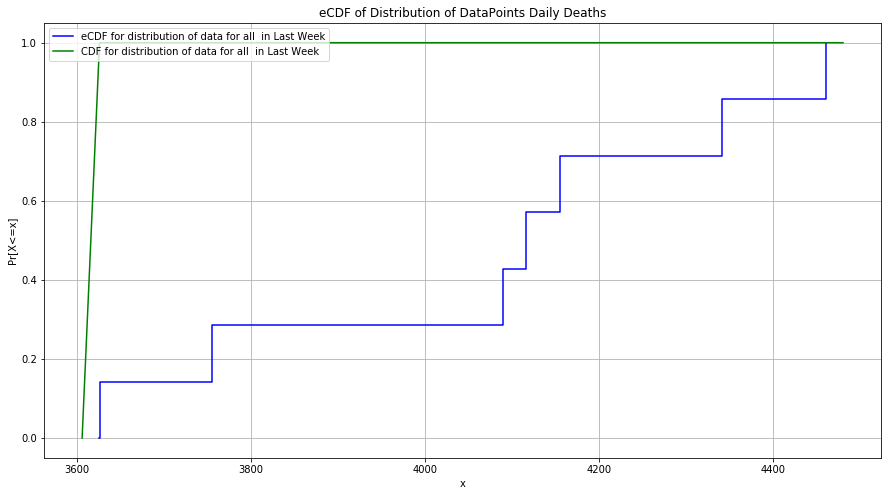

In [86]:
from scipy.stats import poisson
lambda_mme_deaths =  np.mean(secondlastWeek_deaths)
print("MME Poisson distribution for the number of deaths Lambda",lambda_mme_deaths)
F_y=list(poisson.cdf(sorted(lastWeek_deaths),lambda_mme_deaths)) ##Fy_x
factor=(1/7)
Fx_neg=Fx_negX(factor)
Fx_pos=Fx_posX(factor)
KSTest(lastWeek_deaths,lambda_mme_deaths,F_y,Fx_neg,Fx_pos,"Daily Deaths", "Poisson")

#### Poisson Distribution : Number of cases

MME Poisson distribution for the number of cases Lambda 56071.57142857143
X- 1st columns -> k [3626, 4116, 3755, 4155, 4089, 4460, 4341]
F_y -> 2nd Column of the KS Test [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Fx_neg -> 4th Column of the KS Test [0, 0.14, 0.29, 0.43, 0.57, 0.71, 0.86]
Fx_pos -> 5th Column of the KS Test [0.14, 0.29, 0.43, 0.57, 0.71, 0.86, 1.0]
Fxpos_diff_Fy -> 6th Column of the KS Test [0.86, 0.71, 0.5700000000000001, 0.43000000000000005, 0.29000000000000004, 0.14, 0.0]
Fxneg_diff_Fy -> 7th Column of the KS Test  [1.0, 0.86, 0.71, 0.5700000000000001, 0.43000000000000005, 0.29000000000000004, 0.14]
Maximum value found D(Fx,Fy): 1.0
We reject the KS test for 1-sample test: Daily Positive Cases data vs Poisson Distribution 

Sample1: [3626, 3755, 4089, 4116, 4155, 4341, 4460]


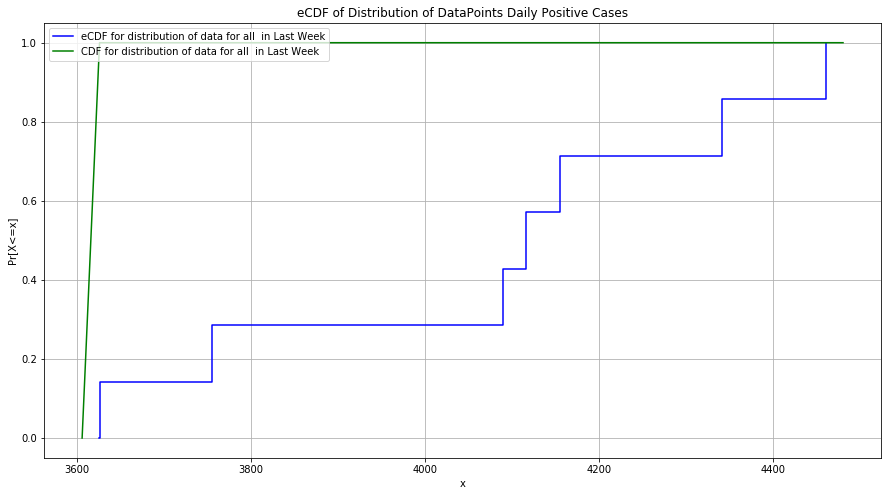

In [87]:
lambda_mme_cases = np.mean(secondlastWeek_cases)
print("MME Poisson distribution for the number of cases Lambda",lambda_mme_cases)
F_y=list(poisson.cdf(sorted(lastWeek_cases),lambda_mme_deaths)) ##Fy_x
KSTest(lastWeek_deaths,lambda_mme_deaths,F_y,Fx_neg,Fx_pos,"Daily Positive Cases", "Poisson")


#### Inference
>For Number of Deaths:  

>> **Null Hypothesis:**  CDF Distribution of data for Number of Deaths is equivalent to the CDF of Poisson Distribution
 
>> **We reject this Hypothesis since Given critical value= 0.05 and maximum distance 1.0 ** 


>**For Number of Cases: **  

>> **Null Hypothesis**:  CDF Distribution of data for Number of Cases is equivalent to the CDF of Poisson Distribution

>> **We reject this Hypothesis since Given critical value= 0.05 and maximum distance 1.0 ** 

> Hence,Given data does not follow the Poisson Distribution


#### 1-Sample KS test with Geometric Distribution 

>For Number of Deaths:  

>> **H0:**  CDF Distribution of data for Number of Deaths is equivalent to the CDF of Geometric Distribution
 
>> **H1:**  CDF Distribution of data for Number of Deaths is NOT equivalent to the CDF of Geometric Distribution

>For Number of Cases:   

>> **H0:**  CDF Distribution of data for Number of Cases is equivalent to the CDF of Geometric Distribution

>> **H1:**  CDF Distribution of data for Number of Cases is NOT equivalent to the CDF of Geometric Distribution

Here we check if the data follows Geometric Distribution





---



---



---


#### Geometric Distribution : Number of deaths

In [88]:
#Geometric distribution requires p -> MME for 3 part of data
## guess lambda for last week
from scipy.special import factorial
from scipy.stats import geom
##Cdf of Geometric distribution

def cdf_geometric(x_dataset, prob):
  array_geom=[]
  for k in range(len(x_dataset)):
    element= (1 - ((1 - prob)** x_dataset[k]))
    array_geom.append(element)
  return array_geom

MME Geometric distribution for the number of deaths p 0.0003098853424233034
X- 1st columns -> k [3626, 4116, 3755, 4155, 4089, 4460, 4341]
F_y -> 2nd Column of the KS Test [0.6749636926745217, 0.6877027412541512, 0.7184140464710127, 0.7207605824661667, 0.7241155441341562, 0.7395698899426617, 0.7490001195039859]
Fx_neg -> 4th Column of the KS Test [0, 0.14, 0.29, 0.43, 0.57, 0.71, 0.86]
Fx_pos -> 5th Column of the KS Test [0.14, 0.29, 0.43, 0.57, 0.71, 0.86, 1.0]
Fxpos_diff_Fy -> 6th Column of the KS Test [0.5349636926745217, 0.3977027412541512, 0.2884140464710127, 0.15076058246616675, 0.014115544134156277, 0.12043011005733828, 0.25099988049601407]
Fxneg_diff_Fy -> 7th Column of the KS Test  [0.6749636926745217, 0.5477027412541512, 0.4284140464710127, 0.2907605824661667, 0.1541155441341563, 0.029569889942661742, 0.11099988049601406]
Maximum value found D(Fx,Fy): 0.6749636926745217
We reject the KS test for 1-sample test: Daily Positive Cases data vs  Geometric  Distribution 

Sample1: [

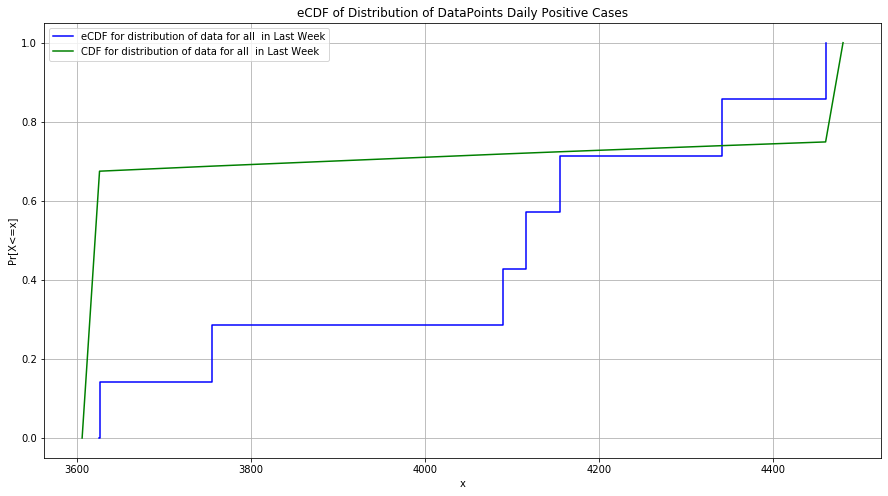

In [89]:
p_mme_deaths =  1/np.mean(secondlastWeek_deaths)
print("MME Geometric distribution for the number of deaths p",p_mme_deaths)
F_y=cdf_geometric(sorted(lastWeek_deaths),p_mme_deaths) ##Fy_x
KSTest(lastWeek_deaths,p_mme_deaths,F_y,Fx_neg,Fx_pos,"Daily Positive Cases", " Geometric ")


#### Geometric Distribution : Number of cases


MME Geometric distribution for the number of cases p  1.7834349466625562e-05
X- 1st columns -> k [61664, 62053, 64691, 63578, 67015, 64875, 68760]
F_y -> 2nd Column of the KS Test [0.6670447332732915, 0.669346657483461, 0.6782184505258857, 0.6845427765051193, 0.685576268364557, 0.6973504026820612, 0.7066241725899417]
Fx_neg -> 4th Column of the KS Test [0, 0.14, 0.29, 0.43, 0.57, 0.71, 0.86]
Fx_pos -> 5th Column of the KS Test [0.14, 0.29, 0.43, 0.57, 0.71, 0.86, 1.0]
Fxpos_diff_Fy -> 6th Column of the KS Test [0.5270447332732915, 0.379346657483461, 0.2482184505258857, 0.11454277650511935, 0.02442373163544298, 0.16264959731793882, 0.2933758274100583]
Fxneg_diff_Fy -> 7th Column of the KS Test  [0.6670447332732915, 0.529346657483461, 0.3882184505258857, 0.2545427765051193, 0.11557626836455703, 0.012649597317938799, 0.15337582741005829]
Maximum value found D(Fx,Fy): 0.6670447332732915
We reject the KS test for 1-sample test: Daily Positive Cases data vs  Geometric  Distribution 

Sample1

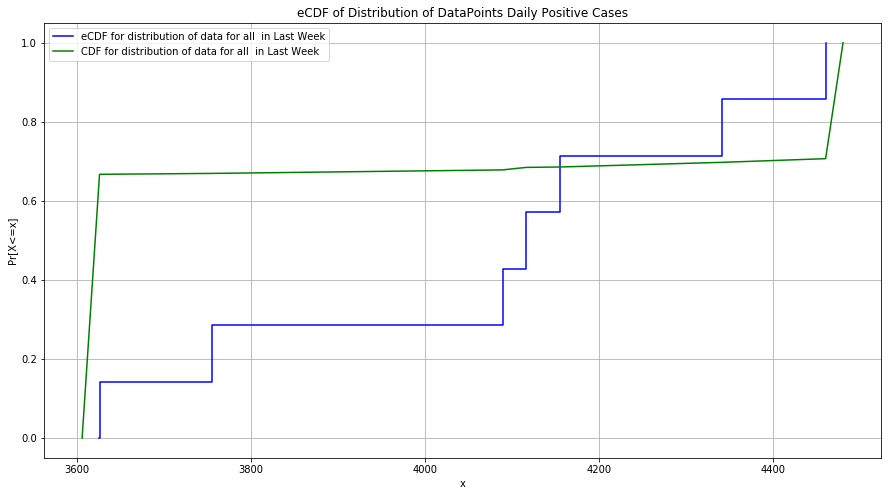

In [90]:
p_mme_cases = 1/np.mean(secondlastWeek_cases)
print("MME Geometric distribution for the number of cases p ",p_mme_cases)
F_y=cdf_geometric(sorted(lastWeek_cases),p_mme_cases) ##Fy_x
KSTest(lastWeek_cases,p_mme_cases,F_y,Fx_neg,Fx_pos,"Daily Positive Cases", " Geometric ")


#### Inference
>For Number of Deaths:  

>> **Null Hypothesis:**  CDF Distribution of data for Number of Deaths is equivalent to the CDF of Geometric Distribution
 
>> **We reject this Hypothesis since Given critical value= 0.05 and maximum distance 0.5068 ** 


>For Number of Cases:   

>> **Null Hypothesis:**  CDF Distribution of data for Number of Cases is equivalent to the CDF of Geometric Distribution

>> **We reject this Hypothesis since Given critical value= 0.05 and maximum distance 0.545 ** 


> Hence,Given data does not follow the Geometric Distribution


 

---



---



---


 ## Binomial Distribution

*   For Binomial, our objective is to check whether distribution of last week of data is equivalent to a distribution of summation of binomial or not


*   Reasoning: Each day in last week is a binomial in-itself. So in total, we 7 binomial distribution. And we know that summation of "m" independent binomial, each having same "p", is also a binomial distribution with:
> #trials = summation of #trials of all "m" binomials    
> p       = p

#### KS test for Binomial Distribution

>For Number of Deaths:  

>> **H0**:  CDF Distribution of data for Number of Deaths is equivalent to the CDF Binomial Distribution
 
>> **H1**:  CDF Distribution of data for Number of Deaths is not equivalent to the CDF Binomial Distribution
 

>For Number of Cases:   

>> **H0**:  CDF Distribution of data for Number of Cases is equivalent to the CDF Binomial Distribution

>> **H1 :**  CDF Distribution of data for Number of Cases is not equivalent to the CDF Binomial Distribution

Here we check if the data follows Binomial Distribution

MME for parameter p(probability) is calculated using the 2nd last week's data.
>For Number of Deaths:  
 n -> Number of trails (Number of positive cases)  
 k -> Number of successes ( Number of Deaths)   

>For Number of Cases:   
 n -> Number of trails (Number of total cases).  
 k -> Number of successes ( Number of positive cases). 




#### Binomial Distribution : Number of deaths

*   Parameters of Summation of binomial distribution:
> #trails = summation of #cases of last week    
> p = p_mme from 2nd last week *bold text*

In [91]:
#Binomial distribution requires p -> MME for 3rd part of data
from scipy.special import factorial
from scipy.special import comb
from scipy.stats import binom

def parametersMMEBionomial(numTrials, numSuccess):
  p=np.sum(numSuccess)/np.sum(numTrials)
  return p

def F_yBinomial(numTrials, numSuccess, p):
  FyArray=[]
  summ=0
  for i in range(len(numSuccess)):
    summ+=numSuccess[i]
    fy=binom.cdf(summ,numTrials,p)
    FyArray.append(fy)

  return FyArray

Deaths Binomial MME p: 0.05755144572880069
X- 1st columns -> k [3626, 4116, 3755, 4155, 4089, 4460, 4341]
F_y -> 2nd Column of the KS Test [0.0, 0.0, 0.0, 0.0, 0.0, 4.096196177508297e-33, 0.9999999999999999]
Fx_neg -> 4th Column of the KS Test [0, 0.14, 0.29, 0.43, 0.57, 0.71, 0.86]
Fx_pos -> 5th Column of the KS Test [0.14, 0.29, 0.43, 0.57, 0.71, 0.86, 1.0]
Fxpos_diff_Fy -> 6th Column of the KS Test [0.14, 0.29, 0.43, 0.57, 0.71, 0.86, 1.1102230246251565e-16]
Fxneg_diff_Fy -> 7th Column of the KS Test  [0.0, 0.14, 0.29, 0.43, 0.57, 0.71, 0.1399999999999999]
Maximum value found D(Fx,Fy): 0.86
We reject the KS test for 1-sample test: Daily Deaths Cases data vs  Binomial  Distribution 

Sample1: [3626, 3755, 4089, 4116, 4155, 4341, 4460]


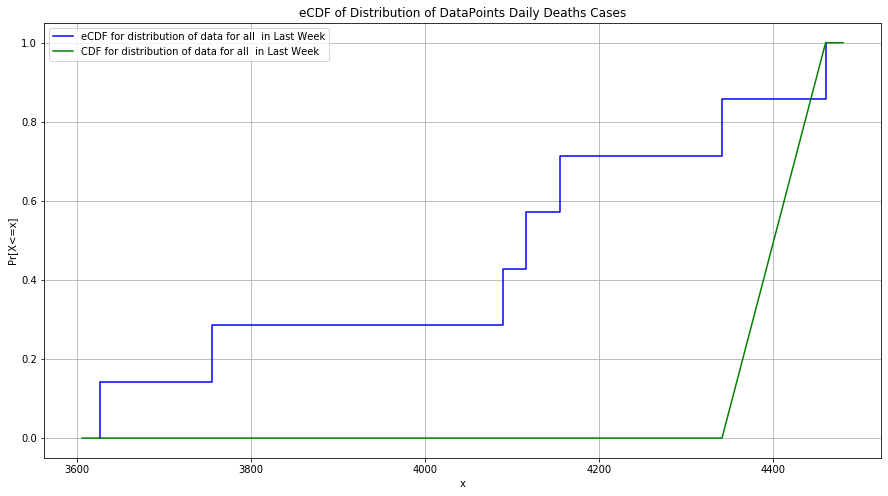

In [92]:
##deaths
pBinomial=parametersMMEBionomial(secondlastWeek_cases,secondlastWeek_deaths)
print("Deaths Binomial MME p:",pBinomial)
f_yBinomial=F_yBinomial(np.sum(lastWeek_cases),lastWeek_deaths ,pBinomial)
KSTest(lastWeek_deaths,pBinomial,f_yBinomial,Fx_neg,Fx_pos,"Daily Deaths Cases", " Binomial ")


#### Binomial Distribution : Number of cases

Cases Binomial MME  p: 0.48644344443218873
X- 1st columns -> k [61664, 62053, 64691, 63578, 67015, 64875, 68760]
F_y -> 2nd Column of the KS Test [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Fx_neg -> 4th Column of the KS Test [0, 0.14, 0.29, 0.43, 0.57, 0.71, 0.86]
Fx_pos -> 5th Column of the KS Test [0.14, 0.29, 0.43, 0.57, 0.71, 0.86, 1.0]
Fxpos_diff_Fy -> 6th Column of the KS Test [0.14, 0.29, 0.43, 0.57, 0.71, 0.86, 1.0]
Fxneg_diff_Fy -> 7th Column of the KS Test  [0.0, 0.14, 0.29, 0.43, 0.57, 0.71, 0.86]
Maximum value found D(Fx,Fy): 1.0
We reject the KS test for 1-sample test: Daily Deaths Cases data vs  Binomial  Distribution 

Sample1: [3626, 3755, 4089, 4116, 4155, 4341, 4460]


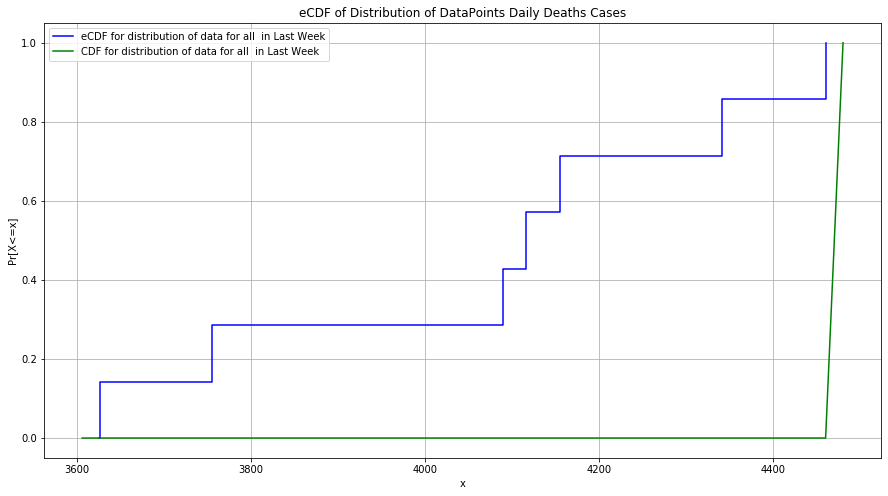

In [93]:
##cases
pBinomial=parametersMMEBionomial(secondlastWeek_testcases,secondlastWeek_cases)
print("Cases Binomial MME  p:",pBinomial)
f_yBinomial=F_yBinomial(np.sum(lastWeek_testcases),sorted(lastWeek_cases),pBinomial)
KSTest(lastWeek_cases,pBinomial,f_yBinomial,Fx_neg,Fx_pos,"Daily Deaths Cases", " Binomial ")


#### Inference
>For Number of Deaths:  

>> **Null Hypothesis:**  CDF Distribution of data for Number of Deaths is equivalent to the CDF Binominal Distribution
 
>> **We reject this Hypothesis since Given critical value= 0.05 and maximum distance 1.0 ** 

>For Number of Cases:   

>> **Null Hypothesis:** CDF Distribution of data for Number of Cases is equivalent to the CDF Binomial Distribution

>> **We reject this Hypothesis since Given critical value= 0.05 and maximum distance 0.86 ** 


> Hence,Given data does not follow the Binominal Distribution





---



---



---


***2-Sample KS test for second last and last week***

>For Number of Deaths:

>> **H0:** CDF Distribution of data for Number of Deaths for 2nd Last week is equivalent to the CDF distribution of Last week

>> **H1:** CDF Distribution of data for Number of Deaths for 2nd Last week is not equivalent to the CDF distribution of Last week


>For Number of Cases:

>>**H0:** CDF Distribution of data for Number of Cases for 2nd last Week is equivalent to the CDF Distribution of Last week

>>**H1:** CDF Distribution of data for Number of Cases for 2nd last Week is not equivalent to the CDF Distribution of Last week
Here we check if both the week's data follow the same distribution


In [94]:
import bisect
from scipy.stats import ks_2samp

def sort_array(sample):
    return np.sort(sample)
def kolgomorov_smirnov_test(sample1, sample2):
    s1 = sorted((sample1))
    s2 = sorted((sample2))
    sample1_index = 0
    sample2_index = 0
    max_distance = 0.0
    cdf1 = 0.0
    cdf2 = 0.0
    p1 = 0
    p2 = 0
    q1 = 0.0
    q2 = 0.0
    while (sample1_index < len(s1) and sample2_index < len(s2)):        
        val1 = s1[sample1_index]
        val2 = s2[sample2_index]     
        if val1 <= val2:
            cdf1 = (sample1_index + 1)/len(s1)
        if val2 <= val1:
            cdf2 = (sample2_index + 1)/len(s2)
        dist = abs(cdf2 - cdf1)
        if dist > max_distance:
            max_distance = dist
            q1 = cdf1
            q2 = cdf2
            if val1 <= val2 and (sample1_index + 1) < len(s1):
              p1 = sample1_index + 1
            if val2 <= val1 and (sample2_index+1) < len(s2):
              p2 = sample2_index + 1
        if val1 <= val2:
          sample1_index = sample1_index + 1
        if val2 <= val1:
          sample2_index = sample2_index + 1
    
    #print(max_distance,s1[p1],s2[p2],q1,q2,p1,p2)
    return max_distance,s1[p1],s2[p2],q1,q2


In [95]:
def draw_plot2(sample1, sample2, week1, week2,sample2maxDist_pt2,sample1maxDist_p1,cdf_2,cdf_1,dif,dataText):
  
  n1 = len(sample1)
  Srt1 = sorted(sample1)

  n2 = len(sample2)
  Srt2 = sorted(sample2)

  delta = 1
  X1 = [0]
  Y1 = [0]
  X1 = [min(Srt1)-delta]
  Y1 = [0]
  for i in range(0,n1):
    X1 = X1 + [Srt1[i], Srt1[i]]
    Y1 = Y1 + [Y1[len(Y1)-1], Y1[len(Y1)-1]+(1/n1)]
  X1 = X1 + [max(Srt1)+delta]
  Y1 = Y1 + [1]
  maxX1=max(Srt1)
  maxX2=max(Srt2)
  maxX=max(maxX1,maxX2)

  X1= X1 + [maxX]
  Y1= Y1 + [1]

  delta = 1
  X2 = [0]
  Y2 = [0]
  X2 = [min(Srt2)-delta]
  Y2 = [0]
  for i in range(0,n2):
    X2 = X2 + [Srt2[i], Srt2[i]]
    Y2 = Y2 + [Y2[len(Y2)-1], Y2[len(Y2)-1]+(1/n2)]
  X2 = X2 + [max(Srt2)+delta]
  Y2 = Y2 + [1]
  X2= X2 + [maxX]
  Y2= Y2 + [1]

  fig = plt.figure('eCDF', figsize=(12,5))
  # plt.figure()
  p1 = X1[bisect.bisect_left(Srt1,sample1maxDist_p1)]
  p2 = X2[bisect.bisect_right(Srt2,sample2maxDist_pt2)]
  
  plt.plot(X1, Y1 ,color='blue',label='eCDF for distribution of data for all  in '+ week1)
  plt.plot(X2, Y2,color='black', label='eCDF for distribution of data for all  in '+ week2)
  plt.plot([sample2maxDist_pt2, sample2maxDist_pt2], [cdf_1,cdf_2], color='green', linestyle='-', linewidth=2, label = "Max Difference Line with length of "+str(dif))
  plt.xlabel('x')
  plt.ylabel('Pr[X<=x]')
  plt.title('eCDF of Distribution of DataPoints '+ dataText)
  plt.legend(loc="upper left")
  plt.grid()
  plt.show()

In [96]:
def check2sampleKSTest(maxDist, dataText):
  print("MaxDistance",maxDist)

  if maxDist < 0.05:
    print('\033[1m' + "We accept the KS test for 2-sample test: Second last week data vs last week data for ", dataText)
  else:
    print('\033[1m' + "We reject the KS test for 2-sample test: Second last week data vs last week data for ",dataText)

def KSTest2Sample(data1,data2,text):
  maxDistance,sample1_maxDist_p1,sample2_maxDist_p2,cdf1,cdf2 = kolgomorov_smirnov_test(data1,data2)
  check2sampleKSTest(maxDistance, text)
  draw_plot2(data1,data2,'2nd Last Week','Last Week',sample2_maxDist_p2,sample1_maxDist_p1,cdf2,cdf1,maxDistance,text)



MaxDistance 0.8571428571428571
We reject the KS test for 2-sample test: Second last week data vs last week data for  Number of Deaths


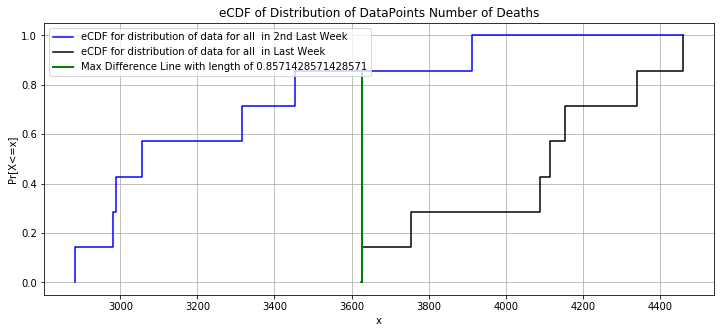

In [97]:
KSTest2Sample(sorted(secondlastWeek_deaths),sorted(lastWeek_deaths),"Number of Deaths")

MaxDistance 1.0
We reject the KS test for 2-sample test: Second last week data vs last week data for  Number of Daily Cases


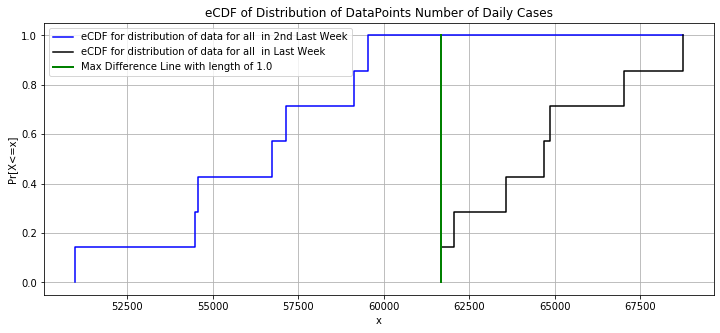

In [98]:
KSTest2Sample(sorted(secondlastWeek_cases),sorted(lastWeek_cases),"Number of Daily Cases")

#### Conclusion:
>For Number of Deaths:

>> **Null Hypothesis**: CDF Distribution of data for Number of Deaths for 2nd Last week is equivalent to the CDF distribution of Last week


>For Number of Cases:

>>**Null Hypothesis**: CDF Distribution of data for Number of Cases for 2nd last Week is equivalent to the CDF Distribution of Last week

Here we checked if both the weeks' data follow the same distribution. Hence we conclude that the two samples do not follow the same distribution

**We reject the Null Hypothesis** that both the datasets follow the same distribution




---



---



---


#### 3.3.2 Permutation Test



>For Number of Deaths:

>> **Null Hypothesis:** Data for Number of Deaths for 2nd Last week is equivalent to the Data of Last week


>For Number of Cases:

>>**Null Hypothesis:** Data for Number of Cases for 2nd last Week is equivalent to the Data of Last week

Here we have perform the permutation-test to check if the two datasets are equivalent

In [99]:
def t_value(data1, data2):
  return abs(np.average(data1) - np.average(data2))

def calculate_p_value(table_data1,table_data2,n = 50000):
  nparr1 = (table_data1)#create_numpy_arr
  nparr2 = (table_data2)
  size1 = np.size(nparr1)
  size2 = np.size(nparr2)
  print(table_data1,table_data2)
  t_observed = t_value(nparr1, nparr2)
  
  total_count_of_indicators = 0
  arr = np.concatenate((nparr1,nparr2))
  # visited = []
  for i in range(0,n):
    arr = np.random.permutation(arr)
    part1, part2 = arr[:size1], arr[size1:]
    t_perm = t_value(part1, part2)
    if(t_perm > t_observed):
      total_count_of_indicators = total_count_of_indicators + 1
  return total_count_of_indicators/n

In [100]:
def accept_or_reject(p_val, threshold):
  if(p_val <= threshold):
    return "rejected"
  else:
    return "accepted"

def accept_or_reject_ks(p_val, threshold):
  if(p_val > threshold):
    return "rejected"
  else:
    return "accepted"

In [101]:
p_val1 = calculate_p_value(sorted(lastWeek_deaths),sorted(secondlastWeek_deaths),50000)
print('\033[1m' + "The p-value for distribution of points with 7 permutations is : " + str(p_val1) +". The threshold is 0.05. Hence, this hypothesis is "+accept_or_reject(p_val1,0.05))


[3626, 3755, 4089, 4116, 4155, 4341, 4460] [2882, 2981, 2988, 3056, 3316, 3454, 3912]
The p-value for distribution of points with 7 permutations is : 0.001. The threshold is 0.05. Hence, this hypothesis is rejected


#### Inference:

>For Number of Deaths:

>> Null Hypothesis: Data for Number of Deaths for 2nd Last week is equivalent to the Data of Last week


>For Number of Cases:

>>Null Hypothesis: Data for Number of Cases for 2nd last Week is equivalent to the Data of Last week

Here we have performed the permutation-test and conclude that the two datasets are very different from each other since the Tobserve for the data is large.

**We reject the null hypothesis** that two datsets are equivalent



### 3.4 Pearson correlation for #deaths and Total Traded Stocks,  #cases and Total Traded Stocks


**Report the Pearson correlation value for #deaths and your X dataset, and also for #cases and your X dataset over one month of data. Use the most relevant column in X to compare against the covid numbers.**



*   We have chose "Total Traded Stock per day" as most relevant column for our X dataset, because it captures the entire activity of the Uber/Lyft stocks for a day. 



In [102]:
import math
def p_coeff(a,b):

    ab_n1 = 0 
    ab_d1 = 0 
    ab_d2 = 0

    mean_a = sum(a)/len(a)
    mean_b = sum(b)/len(b)
    for i, j in zip(a,b):
        ab_n1 += (i- mean_a) * (j- mean_b)
        ab_d1 += (i- mean_a) * (i- mean_a)
        ab_d2 += (j- mean_b) * (j- mean_b)
    ab = ab_n1 / (math.sqrt(ab_d1) * math.sqrt(ab_d2))
    return ab

#### Calculating Total Traded Stocks for the Day

In [103]:
comb_df['UberTradedStocks']= comb_df['UberVolume']* comb_df['UberClosingPrice']
comb_df['LyftTradedStocks']= comb_df['LyftVolume'] * comb_df['LyftClosingPrice']

#### 3.4.1 Pearson correlation for #deaths and Total Traded Stocks

In [104]:
corr= p_coeff(comb_df['cumdeath'], comb_df['UberTradedStocks'])
print('\033[1m' + 'Pearsons correlation of #deaths and Stock Price of Uber: %.3f' % corr)

corr = p_coeff(comb_df['cumdeath'], comb_df['LyftTradedStocks'])
print('\033[1m' + 'Pearsons correlation of #deaths and Stock Price of Lyft: %.3f' % corr)


Pearsons correlation of #deaths and Stock Price of Uber: -0.719
Pearsons correlation of #deaths and Stock Price of Lyft: -0.417


**Inference: We can observe a high -ve linear correlation (-0.72) between stock prices of Uber/Lyft v/s the Deaths, this means that increase in #deaths day on day has adversely affected ride sharing company with less people moving out**

#### 3.4.2 Pearson correlation for #cases and Stock Price

In [105]:
corr= p_coeff(comb_df['cumpositive'],  comb_df['UberTradedStocks'])
print('\033[1m' + 'Pearsons correlation of #Confirmed Cases and Stock Price of Uber: %.3f' % corr)

corr= p_coeff(comb_df['cumpositive'], comb_df['LyftTradedStocks'])
print('\033[1m' + 'Pearsons correlation of #Confirmed Cases and Stock Price of Lyft: %.3f' % corr)


Pearsons correlation of #Confirmed Cases and Stock Price of Uber: -0.773
Pearsons correlation of #Confirmed Cases and Stock Price of Lyft: -0.487


***Inference: We can observe a high -ve (-0.78) linear correlation between stock prices of Uber/Lyft v/s the #Confirm cases, this means that increase in #Confim cases day on day has brought the city to a halt and ride sharing company stocks are going down as less and less people are moving out***

### 3.5 Posterior Distributions for daily deaths parameter estimator 

Assume the daily deaths are Poisson distributed with parameter lambda. Assume an Exponential prior (with mean beta) on lambda. To find beta for the prior, equate the mean of the Exponential prior to that of the Poisson lambda_MME. That is, find the MME of lambda using the first week’s data, and equate this lambda to the mean of Exp(1/beta) to find beta for the prior. Use first week’s data to obtain the posterior for lambda via Bayesian inference. Now, use second week’s data to obtain the new posterior, using prior as posterior after week 1. Repeat till the end of week 4. Plot all posterior distributions on one graph. Report the MAP for all posteriors.

***Let's first derive the Posterior Estimate and then we can generalize the equation***

(-0.5, 1341.5, 1209.5, -0.5)

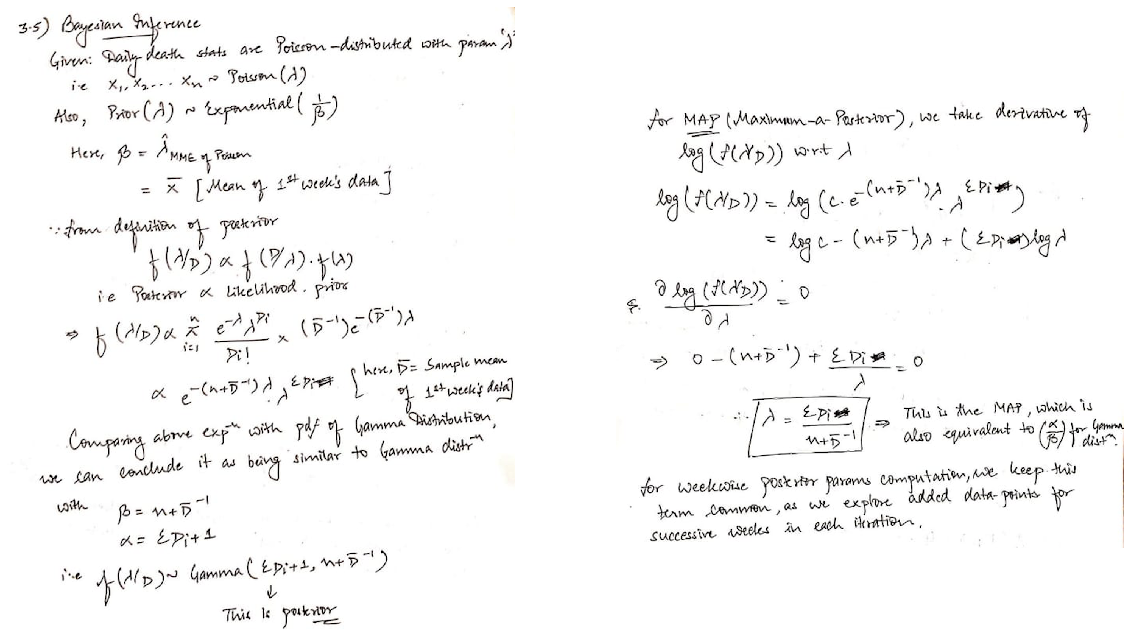

In [106]:
from matplotlib import pyplot as plt
img=mpimg.imread('3.5_derivation1.png')
img1=mpimg.imread('3.5_derivation2.png')

fig = plt.figure(figsize = (20,15))
ax1 = fig.add_subplot(1,2,1)
ax1.axis('off')
ax1.imshow(img, interpolation='nearest')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img1, interpolation='nearest')
ax2.axis('off')



---



---



---


**Posterior becomes a Gamma Distribution with params (Summ(x_i)+1,n + 1/beta)**

In [107]:
import numpy as np
from scipy.stats import gamma
import matplotlib.pyplot as plt

plt.style.use('seaborn')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size

global first_x

def get_first_x():
    weekwise = np.array_split(posterior_data['dailydeath'], 4)
    first_x=np.sum(weekwise[0])
    return first_x


def get_posterior(week_num, sum_x):
    first_x=get_first_x()
    n = week_num*7
    alpha= sum_x +1
    lambda_= n+(7/first_x)
    
    print('\033[1m' + "MAP for Week: {0} = {1}".format(week_num,((alpha - 1)/lambda_)))
    return alpha,lambda_
    
    
def plot_posterior(week_no,alpha,lambda_):
    x = np.linspace(0,1700, 10000)
    scale= 1/lambda_
    res = gamma.pdf(x, alpha, scale=1/lambda_)
    label = "week_no={0},alpha={1},scale={2}".format(week_no,alpha, scale)

    title = "Posterior Distribution : Gamma parametrized on (alpha,lambda)"
    plt.title(title)
    plt.xlabel("Time") 
    plt.ylabel("Probability Density")
    plt.plot(x, res,label=label)


**Report MAP and Plot all posterior distributions on one graph**

In [108]:
def init_data():
    weekwise = np.array_split(posterior_data['dailydeath'], 4)
    rolling_sum=0
    cumsum_weekwise=[]
    for i in range(4):
        rolling_sum=rolling_sum+np.sum(weekwise[i])
        cumsum_weekwise.append(rolling_sum)
        alpha,lambda_= get_posterior(i+1,cumsum_weekwise[i])
        print('\033[1m' + "Posterior Params for Week: {0} are alpha = {1} and lambda = {2}\n".format(i+1,alpha,lambda_))
        plot_posterior(i+1, alpha,lambda_)
        plt.legend(loc="upper right")

MAP for Week: 1 = 290.00007030371205
Posterior Params for Week: 1 are alpha = 2032 and lambda = 7.003446578040374

MAP for Week: 2 = 602.6373545233993
Posterior Params for Week: 2 are alpha = 8440 and lambda = 14.003446578040375

MAP for Week: 3 = 989.6947114257583
Posterior Params for Week: 3 are alpha = 20788 and lambda = 21.003446578040375

MAP for Week: 4 = 1422.2177934065933
Posterior Params for Week: 4 are alpha = 39828 and lambda = 28.003446578040375



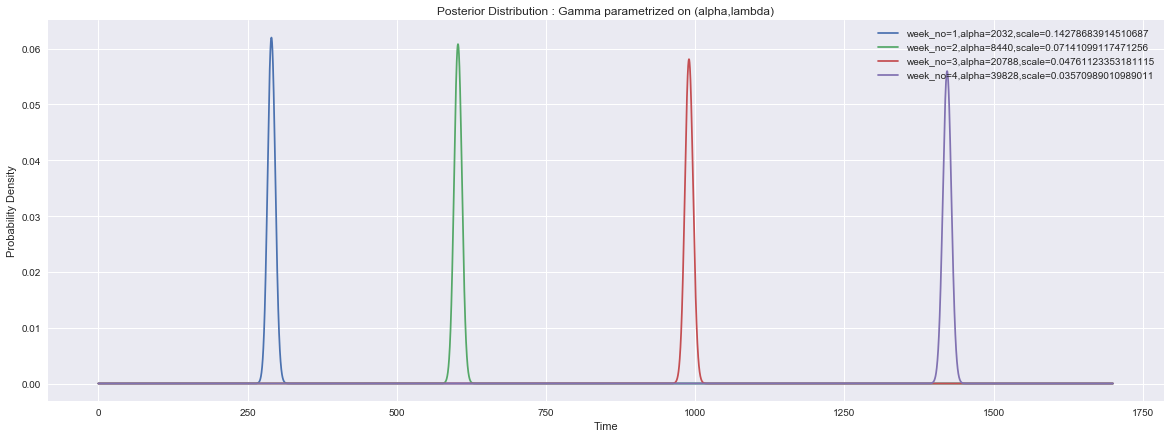

In [109]:
init_data()



*   **Verdict -> At the end of 4th week, the value for lamda is 1422.2177934065933**



## Part 4: Creative Inferences (30%)



---



---


**Propose three new inferences for your dataset and solve them using tools learned in class. You will be graded on creativity/practicality of your inferences. For each inference you propose, provide a paragraph of text to explain why this inference is practical and useful. Also comment on the results of your inference, as appropriate. See “Sample inferences section below for ideas. Only use tools/tests learned in class. This will be 30% of the project grade.** 



---



---


### **Hypothesis1: Performing Chi-Square test to show due to Uber being functional Covid Spread Quickly and once they were shut spread went down**



*   The thinking behind choosing this hypothesis is that, it might be possible that because people were travelling, COVID'19 spread relatively more quickly because of community spread. And when poeple gradually nearly stopped travelling, COVID'19 spread came down.


*   The analogy behind choosing Null hypothesis is that, if we get to proof that the 2 dataset (COVID'19 and X) are indenpendent of each other, then we can safely that fluctuation in COVID'19 spread is not dependent on UBER being operational. We chose UBER becasue it is the leading player in Ride sharing industry.

*   How we built Q-table -> We have choosen +ve and -ve velocity/change for COVID'19 and X dataset, **i.e. on a day if COVID'19 velocity is +ve and on that same day if X's velocity is -ve, we will increment Observed(COVID +ve, X -ve) by 1.**




***Using Chi-square independence test to check if Uber Stock Prices impacted COVID19 cases***

#### Step 1: Define the Hypothesis

###### For this we will be creating two lables for COVID19 changes in Confirmed Cases ("Positive_pctChange") as postive and negative , and similarly changes in Closing price for Uber ("Uber_pctChange") as positive and negative

***For our example, the hypothesis are:***
*   ***H0: The Change in Confirmed Cases(Positive_pctChange) and changes in Closing price for Uber ("Uber_pctChange") are independent (which means they are not associated)***
*   **H1: Change in Confirmed Cases and changes in Closing price for Uber are not independent (which means they are associated)**


In [110]:
var1= 'UberClosingPrice'
var2= 'cumpositive'

comb_df['Uber_pctChange'] = comb_df[var1].pct_change(periods=1)
comb_df['Confirmed_pctChange'] = comb_df[var2].pct_change(periods=1)
comb_df=comb_df.iloc[1:]

comb_df['Uber_Slope'] = comb_df['Uber_pctChange'].pct_change(periods=1)
comb_df['Confirmed_Slope'] = comb_df['Confirmed_pctChange'].pct_change(periods=1)
comb_df=comb_df.iloc[1:]

**Crating Lables for Changes in Confirm Cases and Uber's Closing Price Day On Day**

In [111]:
comb_df['Confirmed_Label']= np.where(comb_df['Confirmed_Slope'] >= 0, 'Positive', 'Negative')
comb_df['Uber_Label']= np.where(comb_df['Uber_Slope'] >= 0, 'Positive', 'Negative')

In [112]:
comb_df.iloc[:,20:28].head(2)

Uber_pctChange  Confirmed_pctChange  Uber_Slope  Confirmed_Slope  \
40       -0.094235                 0.60   -4.318268         0.650000   
39       -0.138338                 0.25    0.468009        -0.583333   

   Confirmed_Label Uber_Label  
40        Positive   Negative  
39        Negative   Positive

#### Step2: Choose a significance Level

For the null hypothesis to be rejected the p-value should be less than the significance level.

Lower α values are generally preferred which may be in the range of 0.01 to 0.10.We choose α = 0.05

#### Step3: Create Contingency table

In [113]:
Q=pd.crosstab(comb_df['Confirmed_Label'], comb_df['Uber_Label'], rownames=['Confirmed_Label'], colnames=['Uber_Label'])
print(Q)

Q_table = comb_df.groupby(['Confirmed_Label','Uber_Label'])['date'].count()
Q_table = Q_table.reset_index()
Q_table.columns = ['Confirmed_Label','Uber_Label','TotalDays']

Uber_Label       Negative  Positive
Confirmed_Label                    
Negative               14         5
Positive               13         6


#### Step4: Calculate Expected Frequency

In [114]:
comb_df.shape
total=  Q_table['TotalDays'].sum()

per_cp= round(Q_table[(Q_table['Confirmed_Label']== 'Positive')].TotalDays.sum()/total,2)
per_up= round(Q_table[(Q_table['Uber_Label']== 'Positive')].TotalDays.sum()/total,2)

ob_cp_up= Q_table[(Q_table['Confirmed_Label']== 'Positive') & (Q_table['Uber_Label'] =='Positive')].TotalDays.sum()
ob_cp_un= Q_table[(Q_table['Confirmed_Label']== 'Positive') & (Q_table['Uber_Label'] =='Negative')].TotalDays.sum()
ob_cn_up= Q_table[(Q_table['Confirmed_Label']== 'Negative') & (Q_table['Uber_Label'] =='Positive')].TotalDays.sum()
ob_cn_un= Q_table[(Q_table['Confirmed_Label']== 'Negative') & (Q_table['Uber_Label'] =='Negative')].TotalDays.sum()

ex_cp_up= per_cp*per_up*total
ex_cp_un= per_cp*(1-per_up)*total
ex_cn_up= (1-per_cp)*per_up*total
ex_cn_un= (1-per_cp)*(1-per_up)*total


print(total, per_cp, per_up, ob_cp_up, ob_cp_un, ob_cn_up, ob_cn_un, ex_cp_up, ex_cp_un, ex_cn_up, ex_cn_un)

38 0.5 0.29 6 13 5 14 5.51 13.489999999999998 5.51 13.489999999999998


#### Step5: Calculate Chi-Square Statistic

In [115]:
def diff_sq(Obs, Exp):
    return ((Obs-Exp)**2)/Exp

In [116]:
Q= diff_sq(ob_cp_up, ex_cp_up) + diff_sq(ob_cp_un, ex_cp_un) + diff_sq(ob_cn_up, ex_cn_up) + diff_sq(ob_cn_un, ex_cn_un)

print('\033[1m' + 'Q statistics value: ' + str(Q))

Q statistics value: 0.12785971728739043


#### Step6: Calculate degrees of freedom

In [117]:
total_rows=2
total_cols=2
dfr = (total_rows - 1) * (total_cols - 1)
print('\033[1m' + 'degree of freedom: ' + str(dfr))

degree of freedom: 1


#### Step7: Find p-value

calculate the p-value from this website: https://www.socscistatistics.com/pvalues/chidistribution.aspx

In [118]:
pval=.720724

In [119]:
# select significance value
alpha = 0.05
# Determine whether to reject or keep your null hypothesis
print('\033[1m' +  'significance=%.3f, p=%.3f' % (alpha, pval))
if pval <= alpha:
    print('\033[1m' +  'COVID spread due to Uber being functinal are associated (reject H0)')
else:
    print('\033[1m' +  'COVID spread due to Uber being functinal are not associated(fail to reject H0)')

significance=0.050, p=0.721
COVID spread due to Uber being functinal are not associated(fail to reject H0)


#### Inference1: Below are the inference for H1



*   ***We Observe that the Null Hypotheiss that the COVID Spread due to Uber being funcitonal are not associated, hence we (fail to reject) or (accept) H0***

*   **For our example we took alpha = 0.05 but p-val is not statiscally significant with value 0.721 so we fail to reject our Null hypothesis**


*   **Verdict -> COVID'19 spread fluctuation does not dependent on UBER being operational**




---



---


## Hypothesis2: Using K-S Test to show that COVID Positive Cases fluctuation and Uber Stock fluctuation follows the Same distribution


*   Motivation: How can we use UBER stock flunction to know more about COVID'19 spread? Several financial institution predicts the best distribution of publicly traded stocks. So what if we can leverage those distribution for UBER to say something like what is the probability of  COVID'19 spread increase by a% or what is the variance of COVID'19 +ve fluctuation , etc. Basically we can say a lot of things, once we get to know the distribution of some dataset like COVID'19


*   Reasoning behind choosing this hypothesis is if somehow we get to proof that, both COVID +ve cases fluctuation & UBER fluctuation follows the same distribution, then we will be nearly able to say all of the above mentioned things.

*   2 sample KS test allows us to check for whether 2 data samples follows same distribution or not.



**We check whether the two datasets (COVID Positive Cases fluctuation and Uber Stock fluctuation)  follow the same distribution**

>> H0: COVID Positive Cases fluctuation distribution is equivalent to Uber Stock fluctuation distribution

>> H1: COVID Positive Cases fluctuation distribution is NOT equivalent to Uber Stock fluctuation distribution

In [120]:
comb_df.head(3)

date  dailypositvecases  dailynegativecases  dailydeath  \
40  2020-03-11                 18                  17           1   
39  2020-03-12                 12                  57           0   
38  2020-03-13                 38                  40           1   

    dailytestingdone  positiveIncrease  negativeIncrease  deathIncrease  \
40                35                 9                13              1   
39                69                 6                17              0   
38                78                20                23              0   

    totalTestResultsIncrease  cumpositive  ...  LyftVolume  WeekNum  \
40                        22           24  ...    19837300        1   
39                        23           30  ...    13630900        1   
38                        43           50  ...    12495000        1   

    UberTradedStocks  LyftTradedStocks  Uber_pctChange  Confirmed_pctChange  \
40      1.130099e+09      5.754801e+08       -0.094235             0.600000   
39      1.221890e+09      3.255059e+08       -0.138338             0.250000   
38      1.216883e+09      3.020042e+08       -0.000442             0.666667   

    Uber_Slope  Confirmed_Slope  Confirmed_Label  Uber_Label  
40   -4.318268         0.650000         Positive    Negative  
39    0.468009        -0.583333         Negative    Positive  
38   -0.996803         1.666667         Positive    Negative  

[3 rows x 26 columns]

In [121]:
df_temp=comb_df.copy()
##percent change in Uber stockprice
Uber_pctChange=df_temp['Uber_pctChange']*100
## percent change in Positive cases
Confirmed_pctChange=df_temp['Confirmed_pctChange']*100 


MaxDistance 0.6842105263157895
We reject the KS test for 2-sample test: Second last week data vs last week data for  COVID Positive Cases fluctuation  vs Uber Stock fluctuation 


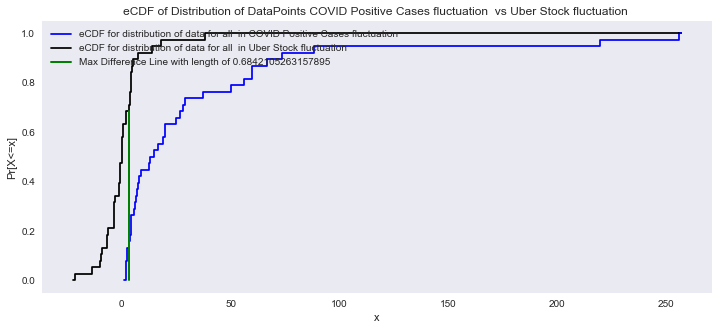

In [122]:
def KSTest2(data1,data2,text):
  maxDistance,sample1_maxDist_p1,sample2_maxDist_p2,cdf1,cdf2 = kolgomorov_smirnov_test(data1,data2)
  check2sampleKSTest(maxDistance, text)
  draw_plot2(data1,data2,'COVID Positive Cases fluctuation ','Uber Stock fluctuation',sample2_maxDist_p2,sample1_maxDist_p1,cdf2,cdf1,maxDistance,text)

KSTest2((Confirmed_pctChange),(Uber_pctChange),"COVID Positive Cases fluctuation  vs Uber Stock fluctuation ")




---



---



---


***Inference: COVID Positive Cases fluctuation distribution is not equivalent to Uber Stock fluctuation distribution***



---



---


## Inference3: Linear regression to find if we can estimate the impact on Stock Prices of Uber because of the severity of covid19, feature taken as (+ve | -ve | death cases), fetching predicted covid values of (+ve | -ve | death) from  Part 3.1



*   Idea: **Can we leverage something for our own piggy bank? In part 3.1, we have AR model to predict COVID'19 spread, so what if we use our own prediction as a feature to predict future UBER stock prices.**




*   We will be building Multiple Linear Regression Model based on # COVID'19 +ve|-ve|death cases as a feature to learn the cofficent/weightage of these fetaures. Our Y will UBER stock prices.




*   X matrix - (30x4) , Y matrix - (30x1), Beta_coffecient - (1x4)




*   OLS method - Beta_hat = ((X_t * X)_inserver) * (X_t * Y)







In [123]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics
%matplotlib inline

In [124]:
train_cols = ['dailypositvecases','dailynegativecases','dailydeath']
target_var=['UberTradedStocks']
des_col=train_cols +target_var

***Let's check the average value of the "UberTradedStocks" column***

Text(0.5, 1.0, 'Plot of the Uber traded Stocks[Log Scale]')

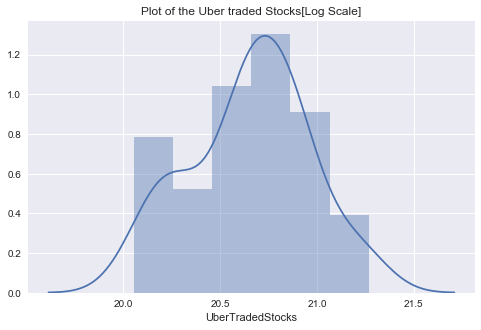

In [125]:
plt.figure(figsize=(8,5))
plt.tight_layout()
sns.distplot(np.log(comb_df['UberTradedStocks']))
plt.title('Plot of the Uber traded Stocks[Log Scale]')

In [126]:
from sklearn.preprocessing import MinMaxScaler
norm_train_data = comb_df[des_col].copy()
scaler = MinMaxScaler() 
norm_train_data[train_cols] = scaler.fit_transform(norm_train_data[train_cols]) 

In [127]:
print(norm_train_data.head(3))
print('\033[1m' + 'check for null instances')
norm_train_data.isnull().any()

    dailypositvecases  dailynegativecases  dailydeath  UberTradedStocks
40           0.000094            0.000000    0.000241      1.130099e+09
39           0.000000            0.000565    0.000000      1.221890e+09
38           0.000409            0.000325    0.000241      1.216883e+09
check for null instances


dailypositvecases     False
dailynegativecases    False
dailydeath            False
UberTradedStocks      False
dtype: bool

In [128]:
X= norm_train_data[train_cols]
y=(norm_train_data[target_var])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [129]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
# y_test = y_test.to_numpy()

In [130]:
print('X shape ', X_train.shape, ' Y shape ', y_train.shape)
# print(X_train)
final_x_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
final_x_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
print("Final X_train shape ", final_x_train.shape)
print("Final X_test shape ", final_x_test.shape)

X shape  (30, 3)  Y shape  (30, 1)
Final X_train shape  (30, 4)
Final X_test shape  (8, 4)


In [131]:
def get_OLS_beta(X, Y):
    X_Transpose=X.T               
    print("x_transpose ", X_Transpose.shape)
    XT_X=np.dot(X_Transpose,X)    
    print("x_transpose * X ", XT_X.shape)
    inv= np.linalg.inv(XT_X)  
    print("inv shape ", inv.shape)
    
    beta_OLS = np.dot(np.dot(inv,X_Transpose), Y)   
    print(beta_OLS)
    print(beta_OLS.shape)
    return beta_OLS

In [132]:
beta_coffe = get_OLS_beta(final_x_train, y_train)
# print(type(float(beta_coffe)))

x_transpose  (4, 30)
x_transpose * X  (4, 4)
inv shape  (4, 4)
[[ 1.27736040e+09]
 [-1.94308436e+09]
 [ 6.69226900e+08]
 [ 7.32864644e+08]]
(4, 1)


In [133]:
y_pred = list(np.dot(final_x_test, beta_coffe).reshape(-1))
print(y_pred)
print("Shpae y_tst ", len(y_test), " sahep y_pred ", len(y_pred))

[781197490.4504665, 712815635.6613774, 1087310810.4952629, 1097308410.4886203, 1261430446.436741, 942725064.577793, 778831866.6976641, 1226998223.7310548]
Shpae y_tst  8  sahep y_pred  8


**Let's Find the Root Mean Square Error**

In [134]:
print('\033[1m' + 'Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('\033[1m' + 'Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('\033[1m' + 'Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 126902110.10379453
Mean Squared Error: 1.945818606178019e+16
Root Mean Squared Error: 139492602.17581502


In [135]:
y_test = y_test['UberTradedStocks'].tolist()

**Let's observe the Actual v/s Predicted values of few houses**

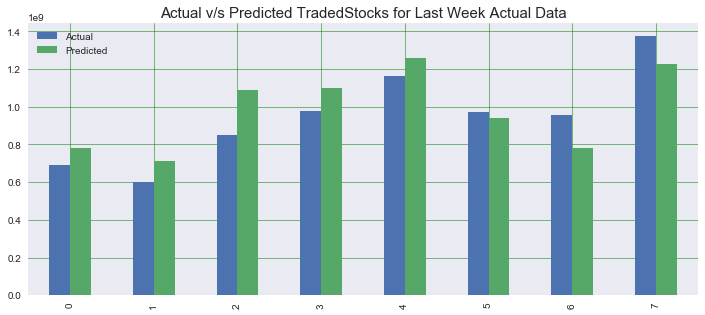

In [136]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.copy()
df1.plot(kind='bar',figsize=(12,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual v/s Predicted TradedStocks for Last Week Actual Data',size=15)
plt.show()

**Let's observe the Beta Coefficients derived for our regressor**

In [137]:
columns=['Beta_0']+  list(X.columns)
columns
coeff_df = pd.DataFrame(beta_coffe.reshape(4,1),columns, columns=['Coefficient'])  
coeff_df

Coefficient
Beta_0              1.277360e+09
dailypositvecases  -1.943084e+09
dailynegativecases  6.692269e+08
dailydeath          7.328646e+08

## Inference:


*   We can observe we have a high negative beta coefficient for daily positive cases (-1.94) which implies as the confirm cases are increases stock prices are goin down
*   We have a fairly high postive beta cofficient for negative cases which implies more the negative cases more the spread is less and Stocks go up



## **Let's Predict One Week Unseen Data !!**

**We Will leverage the Code for predicting one week data from part 3.1 for covid cases (AR (p=3) with last 21 days of observed data to get next 7 days unseen data)**

**Lets take Last 21 Days Data and predict the Positive | Negative | Death Cases for next 7 days**

In [138]:
last_week= comb_df.copy()
last_week= last_week[train_cols].tail(28)
# last_week


In [139]:
def forecast_next7days(type_case):
  y_data = load_data(last_week[type_case].head(21))
  # print(y_data)
  beta_OLS,Y = get_beta_coeff(y_data,3)
  # pd.DataFrame(last_week[type_case], columns=[type_case])
  forecast_week_confirm = predict(beta_OLS,Y,3,pd.DataFrame(last_week[type_case].tail(7), columns=[type_case]), type_case)
  forecast_week_confirm= pd.DataFrame(forecast_week_confirm)
  # print(forecast_week_confirm.shape)
  # forecast_week_confirm= forecast_week_confirm.tail(7)
  return forecast_week_confirm


In [140]:
forecast_positive= forecast_next7days('dailypositvecases')
forecast_neagtive= forecast_next7days('dailynegativecases')
forecast_death= forecast_next7days('dailydeath')


In [141]:
print('\033[1m' + 'Last Date Observed in our Data Frame: ' + comb_df['date'].max())

Last Date Observed in our Data Frame: 2020-05-04


In [142]:
next_7days = pd.date_range(start="2020-05-05",end="2020-05-10")

In [143]:
forecasted_features = pd.DataFrame({'dailypositvecases': forecast_positive[0], 'dailynegativecases': forecast_neagtive[0],
                                    'dailydeath':forecast_death[0]})

In [144]:
forecasted_features.head()

dailypositvecases  dailynegativecases   dailydeath
0       54018.400263        51903.597583  3132.637614
1       54788.996420        56889.587302  3069.122713
2       57157.513615        55296.058923  3355.483665
3       60187.066735        63941.183431  3485.257318
4       62024.690000        66426.698116  3827.599242

## Let's Predict One Week Unseen Uber Traded Stocks with our Regressor !!

In [145]:
norm_forecast_data = scaler.fit_transform(forecasted_features) 


In [146]:
norm_forecast_data = np.hstack((np.ones((norm_forecast_data.shape[0], 1)), norm_forecast_data))
uberstocks_pred = list(np.dot(norm_forecast_data, beta_coffe).reshape(-1))

In [147]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=next_7days, y=forecasted_features['dailypositvecases'], mode='lines+markers', name='Confirmed'))
fig.add_trace(go.Scatter(x=next_7days, y=forecasted_features['dailydeath'], mode='lines+markers', name='Deaths'))
fig.add_trace(go.Scatter(x=next_7days, y=forecasted_features['dailynegativecases'], mode='lines+markers', name='Negative'))

fig.update_layout(
        xaxis_title="Date",
        yaxis_title="Forecasted Cases",
        title = '[Daily Cases] - Confirmed, Deaths & Negative'
    )
fig.show()

## Let's Predict One Week Unseen Uber Traded Stocks with our Regressor !!

In [148]:
norm_forecast_data = scaler.fit_transform(forecasted_features) 


In [149]:
norm_forecast_data = np.hstack((np.ones((norm_forecast_data.shape[0], 1)), norm_forecast_data))
uberstocks_pred = list(np.dot(norm_forecast_data, beta_coffe).reshape(-1))

In [150]:
uberstocks_pred = pd.DataFrame(uberstocks_pred)
uberstocks_pred.columns= ['UberPredicted_Stocks']
uberstocks_pred

UberPredicted_Stocks
0          1.315187e+09
1          1.302930e+09
2          9.403786e+08
3          7.220444e+08
4          6.468860e+08
5          6.293824e+08
6          7.363676e+08

In [151]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=next_7days, y=uberstocks_pred['UberPredicted_Stocks'], mode='lines+markers', name='UberPredicted_Stocks'))
fig.add_trace(go.Scatter(x=next_7days, y=forecasted_features['dailypositvecases'], mode='lines+markers', name='Confirmed_Predicted'))
fig.add_trace(go.Scatter(x=next_7days, y=forecasted_features['dailydeath'], mode='lines+markers', name='Deaths_Predicted'))
fig.add_trace(go.Scatter(x=next_7days, y=forecasted_features['dailynegativecases'], mode='lines+markers', name='Negative_Predicted'))

fig.update_layout(
        xaxis_title="Date",
        yaxis_title="Forecasted Cases",
        title = 'Log Scale : [Daily Cases - Confirmed, Deaths & Negative] V/s [UberStocks Predicted Cases]',
        yaxis_type="log"
    )
fig.show()

**Inference: we can see that we have quite a good predicting power of UberStocks from Simple linear Regression Model**